## task



[Interview.test-task 1, 2.pdf](Interview.test-task 1, 2.pdf)

[https://hh.ru/vacancy/87948954?hhtmFrom=chat](https://hh.ru/vacancy/87948954?hhtmFrom=chat)

[https://chatik.hh.ru/chat/3482754117](https://chatik.hh.ru/chat/3482754117)

Python программист-разработчик – Python Developer [https://hh.ru/vacancy/87948954](https://hh.ru/vacancy/87948954)

AllmaGen
США allmagen.com



## exploring



interview.X.csv and interview.y.csv - показы и события.



### interview.X.csv



In [1]:
import pandas as pd
from myown_pack.exploring import describe
from myown_pack.exploring import explore_sparse_classes

df = pd.read_csv('interview.X.csv')
print(df.head(5).to_string())
print(df.tail(5).to_string())
describe(df)
explore_sparse_classes(df)

#+begin_example
              reg_time                                   uid  fc_imp_chk  fc_time_chk  utmtr  mm_dma   osName      model      hardware                         site_id
0  2021-07-21 19:25:47  00000000-0000-0001-6268-955448351062           0            7      6     530      iOS  iPhone XR  Mobile Phone              soaps.sheknows.com
1  2021-07-21 19:25:51  00000000-0000-0001-6268-955448381600           0            7      6     612      iOS     iPhone  Mobile Phone                  www.forbes.com
2  2021-07-21 19:25:52  00000000-0000-0001-6268-955460621935           0            7      6     524  Android   SM-G998U  Mobile Phone                 www.parents.com
3  2021-07-21 19:26:05  00000000-0000-0001-6268-955631601064           0            7      6     659      iOS     iPhone  Mobile Phone        livingforthesunshine.com
4  2021-07-21 19:26:05  00000000-0000-0001-6268-955659731502           0            7      6     505      iOS     iPhone  Mobile Phone  www.pro-footb

### interview.y.csv



In [1]:
import pandas as pd
from myown_pack.exploring import describe
from myown_pack.exploring import explore_sparse_classes
df = pd.read_csv('interview.y.csv')
# print(df.head(5).to_string())
# print(df.tail(5).to_string())
describe(df)
explore_sparse_classes(df)

#+begin_example
                                         uid            tag
count                                  15359          15359
unique                                  9661             11
top     00000000-0000-0001-6269-125248461755  vregistration
freq                                      20           6340
                                         uid            tag
count                                  15359          15359
unique                                  9661             11
top     00000000-0000-0001-6269-125248461755  vregistration
freq                                      20           6340
uid    object
tag    object
dtype: object
uid total features: 9661
percent 1 records: 154 categories: 9661
features lower percent 9661
00000000-0000-0001-6269-125248461755    0.130217
00000000-0000-0001-6269-728114091454    0.110684
00000000-0000-0001-6269-928102541212    0.065108
00000000-0000-0001-6277-863996211392    0.058598
00000000-0000-0001-6273-182905651400    0.045576
0000

### connection by uid



X.csv is large, we will take a part of it

We can see that

-   Uid is uniqie in X.csv. One uid have several tags.
-   0.001 of X.csv have corresponding record in y.csv
-   every uid in X have only one tag in y.



In [1]:
import pandas as pd
import numpy as np
from myown_pack.exploring import count_fkey

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
dfy.drop_duplicates(["uid", "tag"], inplace=True)
dfx = dfx.sample(frac=0.02, random_state=42)
print("dfx.shape", dfx.shape)
print("-- dfx.uid, dfy.uid:")
count_fkey(dfx.uid, dfy.uid)
print("-- dfy.uid, dfx.uid:")
count_fkey(dfy.uid, dfx.uid)

#+begin_example
dfx.shape (19105, 10)
-- dfx.uid, dfy.uid:
Count of unique values of the first key and count of values in the second key:
[uid]: 19105
[uid]: 12477
True is values of the first key that exist in the second key:
   values  count
0   False  18911
1    True    194
-- dfy.uid, dfx.uid:
Count of unique values of the first key and count of values in the second key:
[uid]: 9661
[uid]: 19105
True is values of the first key that exist in the second key:
   values  count
0   False   9467
1    True    194
#+end_example

### explore interview.X.csv connection by uid



Lets explore part of X.csv that have uid in y.csv. and compare with interview.X.csv

-   nypost.com is more frequent than www.dailymotion.com here.
-   www.dailymotion.com is more frequent in full X.csv.



In [1]:
import pandas as pd
from myown_pack.exploring import describe
from myown_pack.exploring import explore_sparse_classes

df = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
df = df[df['uid'].isin(dfy['uid'])]
print("df.shape", df.shape)
print(df.head(5).to_string())
print(df.tail(5).to_string())
describe(df)
explore_sparse_classes(df)

#+begin_example
df.shape (9646, 10)
                reg_time                                   uid  fc_imp_chk  fc_time_chk  utmtr  mm_dma   osName     model      hardware                    site_id
72   2021-07-21 19:29:20  00000000-0000-0001-6268-957597321099           0            7      6     517  Android  SM-N960U  Mobile Phone             dotesports.com
81   2021-07-21 19:29:54  00000000-0000-0001-6268-957946481763           0            7      6     505  Android  Pixel 4a  Mobile Phone         online.seterra.com
83   2021-07-21 19:30:05  00000000-0000-0001-6268-958052831367           0            7      6     501      iOS    iPhone  Mobile Phone               hiphopdx.com
86   2021-07-21 19:30:15  00000000-0000-0001-6268-958153731939           0            7      6     517  Android  SM-G991U  Mobile Phone       www.vivaelbirdos.com
111  2021-07-21 19:32:05  00000000-0000-0001-6268-959263331420           0            7      6     517  Android  SM-N975U  Mobile Phone  www.landgran

### How meny uids repeats?



In [1]:
import pandas as pd
from myown_pack.exploring import describe
from myown_pack.exploring import explore_sparse_classes

# df = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')

ut = {}
print("repeats of uids inside tag( without duplicates, all):")
print(dfy.drop_duplicates().shape, dfy.shape)
for v in dfy.tag.unique():
    ut[v] = dfy[dfy['tag'] == v].uid.tolist()
    print(v, len(set(ut[v])), len(dfy[dfy['tag'] == v].uid.tolist()))
    # print(dfy.uid.tolist())

# df = df[df['uid'].isin(dfy['uid'])]
# print("df.shape", df.shape)
# print(df.head(5).to_string())

#+begin_example
repeats of uids inside tag( without duplicates, all):
(12477, 2) (15359, 2)
fclick 3780 3942
vregistration 5493 6340
registration 2380 4163
vcontent 455 503
vsignup 229 247
vmisc 42 46
vlead 63 66
signup 17 27
misc 3 4
lead 3 4
content 12 17
#+end_example

### count empty or na



In [1]:
import pandas as pd
from myown_pack.exploring import corr_analysis
from myown_pack.exploring import frequency_analysis
from myown_pack.exploring import describe

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
dfy.drop_duplicates(["uid", "tag"], inplace=True)
# dfx = dfx.sample(frac=0.05, random_state=42)
df = pd.merge(dfx, dfy, on="uid", how="left")
print(df.isna().sum())

#+begin_example
reg_time            0
uid                 0
fc_imp_chk          0
fc_time_chk         0
utmtr               0
mm_dma              0
osName           7914
model            8418
hardware         8208
site_id             0
tag            945593
dtype: int64
#+end_example

### fclick



We cat see that fclick event is very rare and y target is skewed in
 interview.X.csv

We have 3780 fclick events.



In [1]:
import pandas as pd
from myown_pack.exploring import describe
from myown_pack.exploring import explore_sparse_classes

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')

dfx = dfx.sample(frac=0.06, random_state=42)

# ------- 1) fraction of 0.06 of interview.X.csv
# - merge x and y - join dataframes
# print(dfy.groupby('tag').tag.size())
dfy.drop_duplicates(["uid", "tag"], inplace=True)
df = pd.merge(dfx, dfy, on="uid", how="left")
# - select rows we require
df.drop(columns=['uid'], inplace=True)
# - prepare major columns
df['tag'].fillna(0, inplace=True)
tags = dfy.tag.unique().tolist() # ['fclick', 'vregistration', 'registration', 'vcontent', 'vsignup', 'vmisc', 'vlead', 'signup', 'misc', 'lead', 'content']
tag = 'fclick'
tags2 = tags.copy()
tags2.remove(tag)
df.replace(tags2, 0, inplace=True)
df.replace('fclick', 1, inplace=True)
# id filed:
df.reset_index(drop=True, inplace=True)

describe(df[['tag']])
print(df['tag'].value_counts())
from myown_pack.common import values_byfreq
values_byfreq(df['tag'], min_freq=0.3)

# ------- 2) count of all flicks
df = dfy
# - select rows we require
df.drop(columns=['uid'], inplace=True)
# - prepare major columns
df['tag'].fillna(0, inplace=True)
tags = dfy.tag.unique().tolist() # ['fclick', 'vregistration', 'registration', 'vcontent', 'vsignup', 'vmisc', 'vlead', 'signup', 'misc', 'lead', 'content']
tag = 'fclick'
tags2 = tags.copy()
tags2.remove(tag)
df.replace(tags2, 0, inplace=True)
df.replace('fclick', 1, inplace=True)
# id filed:
df.reset_index(drop=True, inplace=True)

describe(df[['tag']])
print(df['tag'].value_counts())
from myown_pack.common import values_byfreq
values_byfreq(df['tag'], min_freq=0.3)

#+begin_example
                tag
count  57497.000000
mean       0.004070
std        0.063665
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
tag
0    57263
1      234
Name: count, dtype: int64
vcp_s tag
0    0.99593
1    0.00407
Name: count, dtype: float64
                tag
count  12477.000000
mean       0.302957
std        0.459555
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
tag
0    8697
1    3780
Name: count, dtype: int64
vcp_s tag
0    0.697043
1    0.302957
Name: count, dtype: float64
#+end_example

## correlation analysis



for all analysis we take 0.05 random records from "interview.X.csv".



### "no tag" vs "with tags" x7



Lets set tags field for nan as 0 and "with tag" as 1.
We multiply "with tags" by 7 just to see better on plot difference.



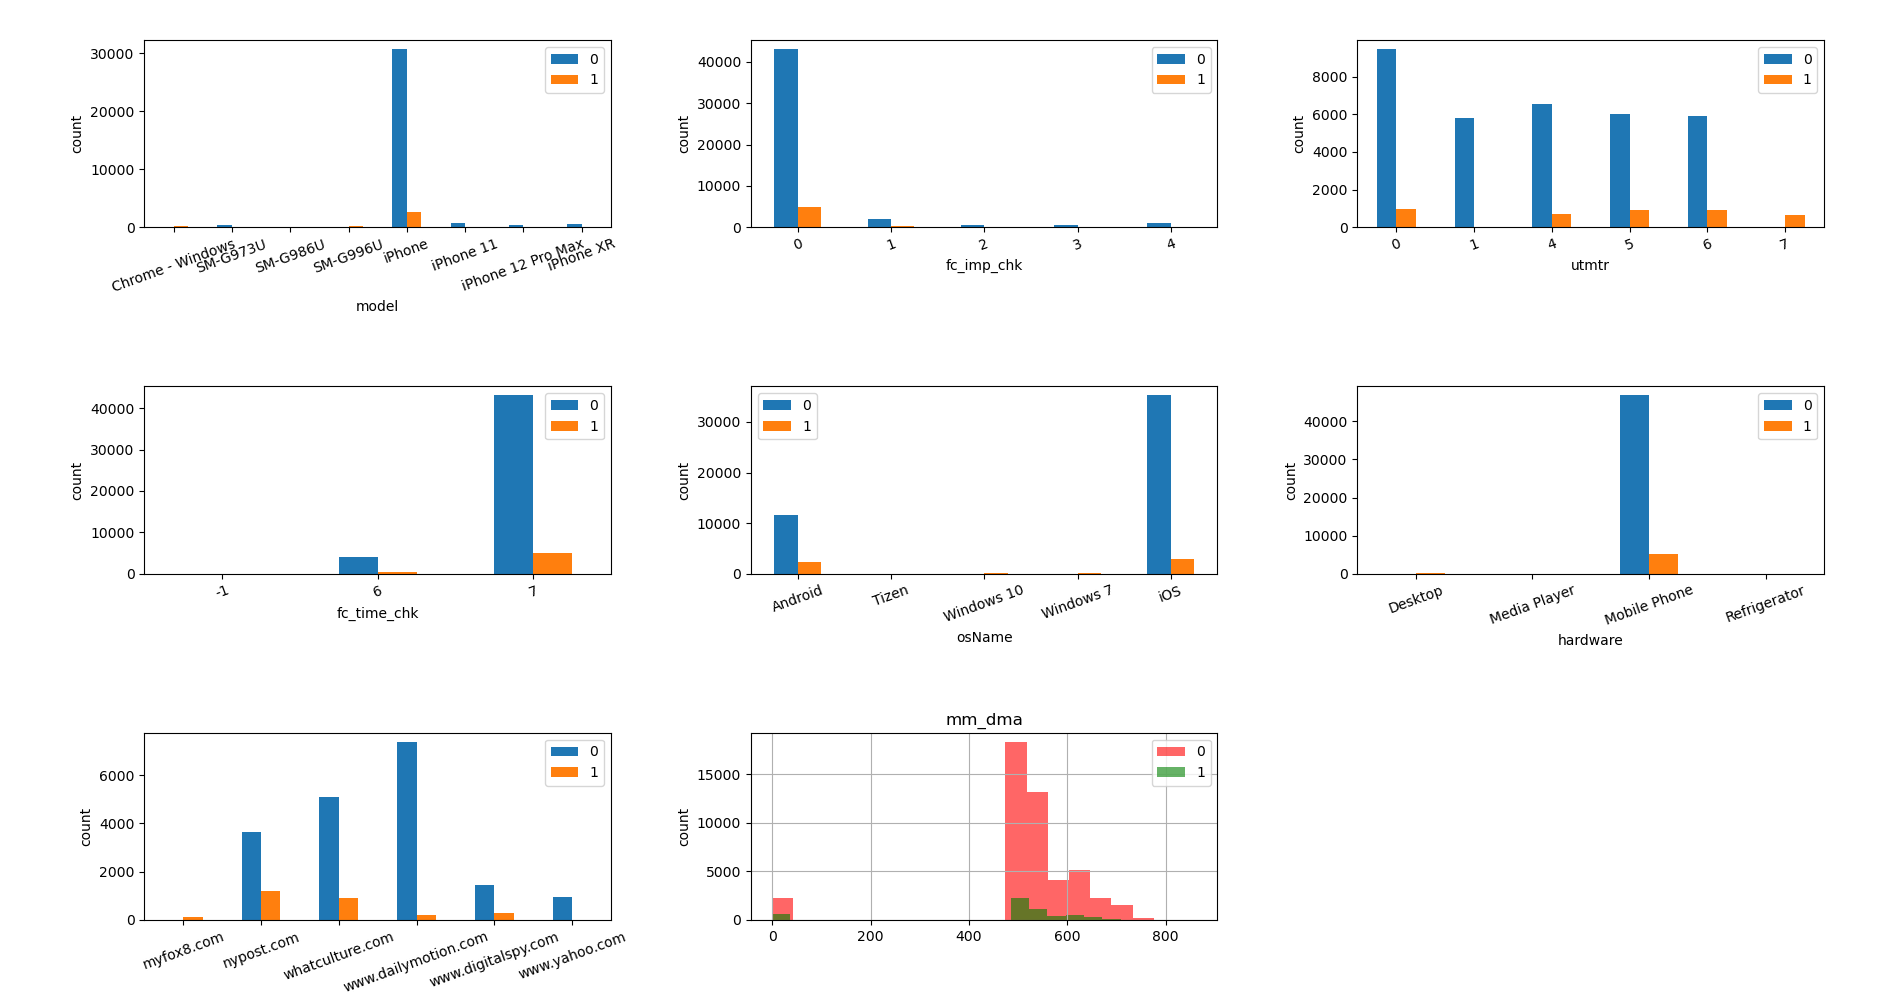

In [1]:
import pandas as pd
from myown_pack.exploring import corr_analysis
from myown_pack.exploring import frequency_analysis
from myown_pack.exploring import describe

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
dfy.drop_duplicates(["uid", "tag"], inplace=True)
dfx = dfx.sample(frac=0.05, random_state=42)
tags = dfy.tag.unique().tolist()
print(tags) # ['fclick', 'vregistration', 'registration', 'vcontent', 'vsignup', 'vmisc', 'vlead', 'signup', 'misc', 'lead', 'content']
# tag = 'fclick'
# 1) merge x and y
df = pd.merge(dfx, dfy, on="uid", how="left")
# 2) tag nan => 0
df['tag'].fillna(0, inplace=True)

# print(df.isna().sum())
# print(df.shape)
# df.dropna(subset=['tag'], inplace=True)
# 3) filter tag != 0 - to filter dfy with tags only
# df = df[df['tag'] != 0]
# 4) tag != tag => 0 - to see only one tag and others at background
# tags2 = tags.copy()
# tags2.remove(tag)
# print(tags2)
# 3) replace all tags as 1
df.replace(tags, 1, inplace=True)
# print(df.head(15).to_string())
# df = df[df['tag'] != 0]
# print(df['tag'].unique())
# 5) drop timeline and uid
df.drop(columns=['uid', 'reg_time'], inplace=True)
# 6) increase "with tag"
dfw = df[df['tag'] == 1]
df = pd.concat([df, dfw], ignore_index=True) # x2
df = pd.concat([df, dfw], ignore_index=True) # x3
df = pd.concat([df, dfw], ignore_index=True) # x4
df = pd.concat([df, dfw], ignore_index=True) # x5
df = pd.concat([df, dfw], ignore_index=True) # x6
df = pd.concat([df, dfw], ignore_index=True) # x7
# 7)
frequency_analysis(df, target='tag', image_save='./imgs/no_vs_tag.png', t0=0, t1=1)

### "with tags" vs tag == 'fclick'



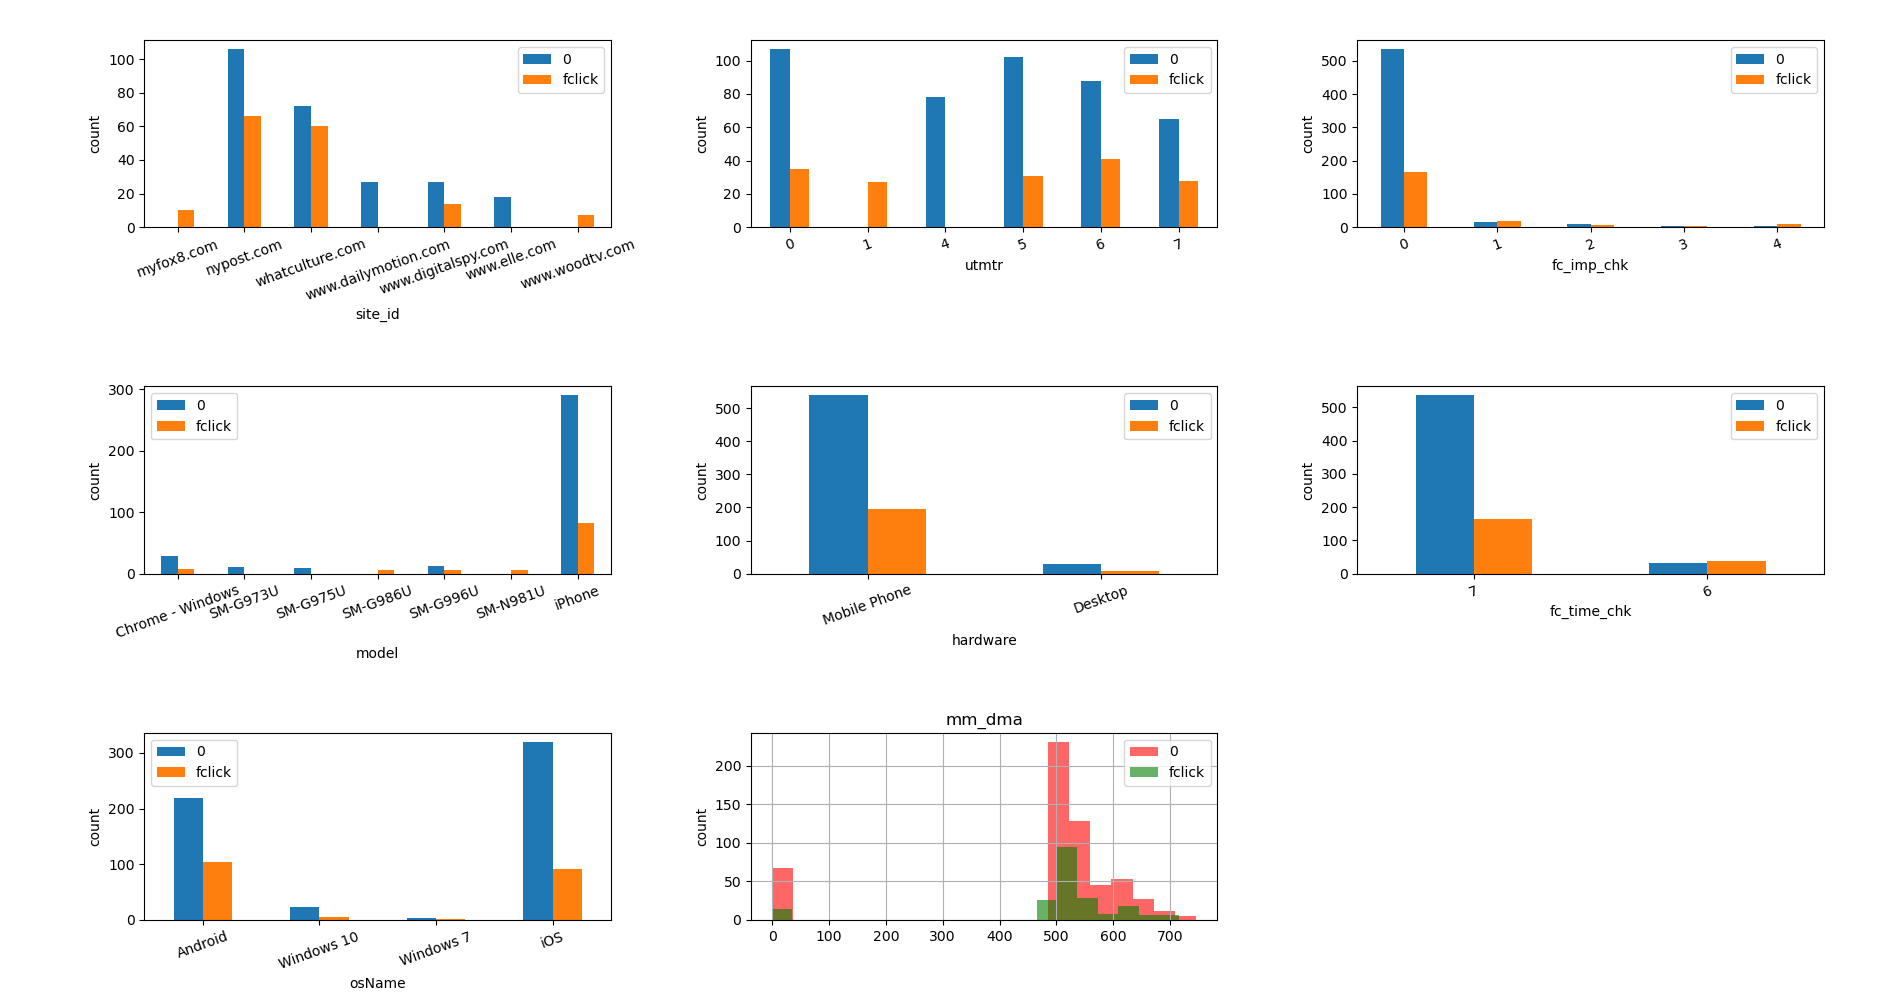

In [1]:
import pandas as pd
from myown_pack.exploring import corr_analysis
from myown_pack.exploring import frequency_analysis
from myown_pack.exploring import describe

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
dfy.drop_duplicates(["uid", "tag"], inplace=True)
dfx = dfx.sample(frac=0.05, random_state=42)
tags = dfy.tag.unique().tolist()
print(tags) # ['fclick', 'vregistration', 'registration', 'vcontent', 'vsignup', 'vmisc', 'vlead', 'signup', 'misc', 'lead', 'content']

tag = 'fclick'
# 1) merge x and y
df = pd.merge(dfx, dfy, on="uid", how="left")
# 2) tag nan => 0
df['tag'].fillna(0, inplace=True)
# 3) filter tag != 0 - to filter dfy with tags only
df = df[df['tag'] != 0]
# 4) tag != tag => 0 - to see only one tag and others at background
tags2 = tags.copy()
tags2.remove(tag)
# print(tags2)

df.replace(tags2, 0, inplace=True)
# 5) drop timeline and uid
df.drop(columns=['uid', 'reg_time'], inplace=True)
# 6)
frequency_analysis(df, target='tag', image_save=f'./imgs/no_vs_{tag}.png', t0=0, t1=tag)

### "with tags" vs tag == 'vregistration'



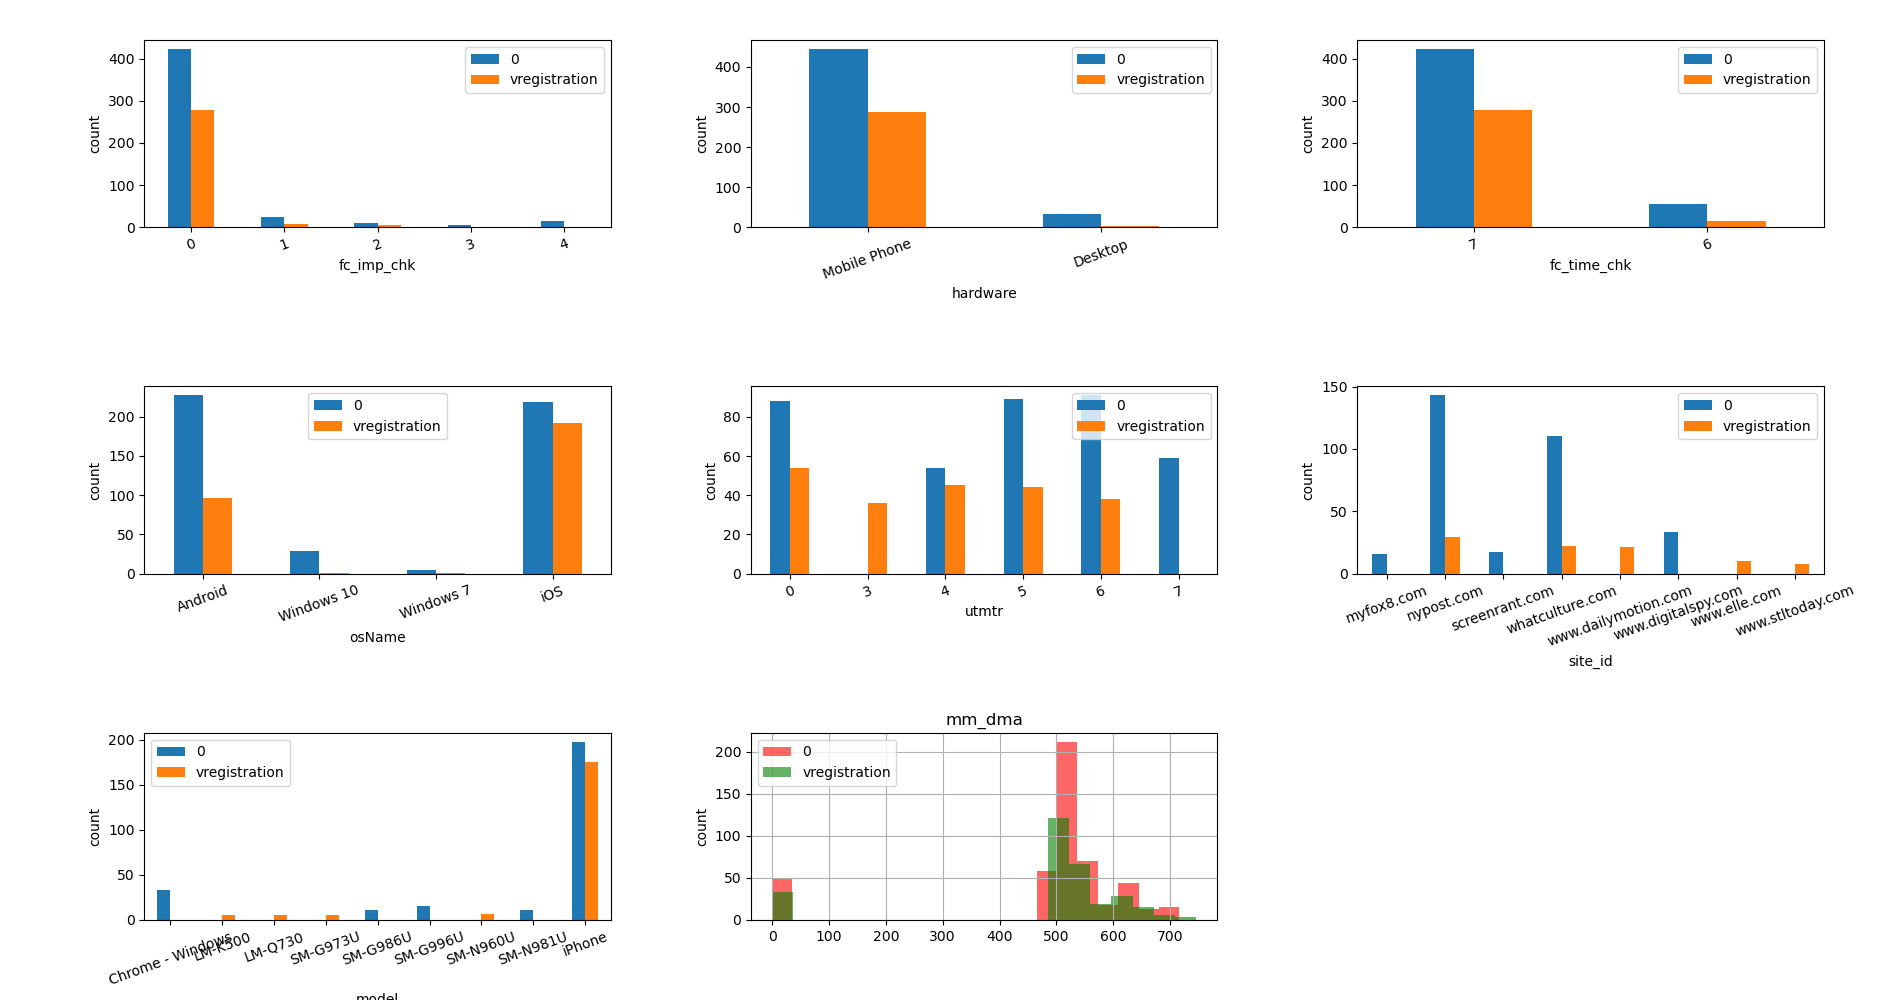

In [1]:
import pandas as pd
from myown_pack.exploring import corr_analysis
from myown_pack.exploring import frequency_analysis
from myown_pack.exploring import describe

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
dfy.drop_duplicates(["uid", "tag"], inplace=True)
dfx = dfx.sample(frac=0.05, random_state=42)
tags = dfy.tag.unique().tolist()
print(tags) # ['fclick', 'vregistration', 'registration', 'vcontent', 'vsignup', 'vmisc', 'vlead', 'signup', 'misc', 'lead', 'content']

tag = 'vregistration'
# 1) merge x and y
df = pd.merge(dfx, dfy, on="uid", how="left")
# 2) tag nan => 0
df['tag'].fillna(0, inplace=True)
# 3) filter tag != 0 - to filter dfy with tags only
df = df[df['tag'] != 0]
# 4) tag != tag => 0 - to see only one tag and others at background
tags2 = tags.copy()
tags2.remove(tag)
# print(tags2)

df.replace(tags2, 0, inplace=True)
# 5) drop timeline and uid
df.drop(columns=['uid', 'reg_time'], inplace=True)
# 6)
frequency_analysis(df, target='tag', image_save=f'./imgs/no_vs_{tag}.png', t0=0, t1=tag)

### "with tags" vs tag == 'registration'



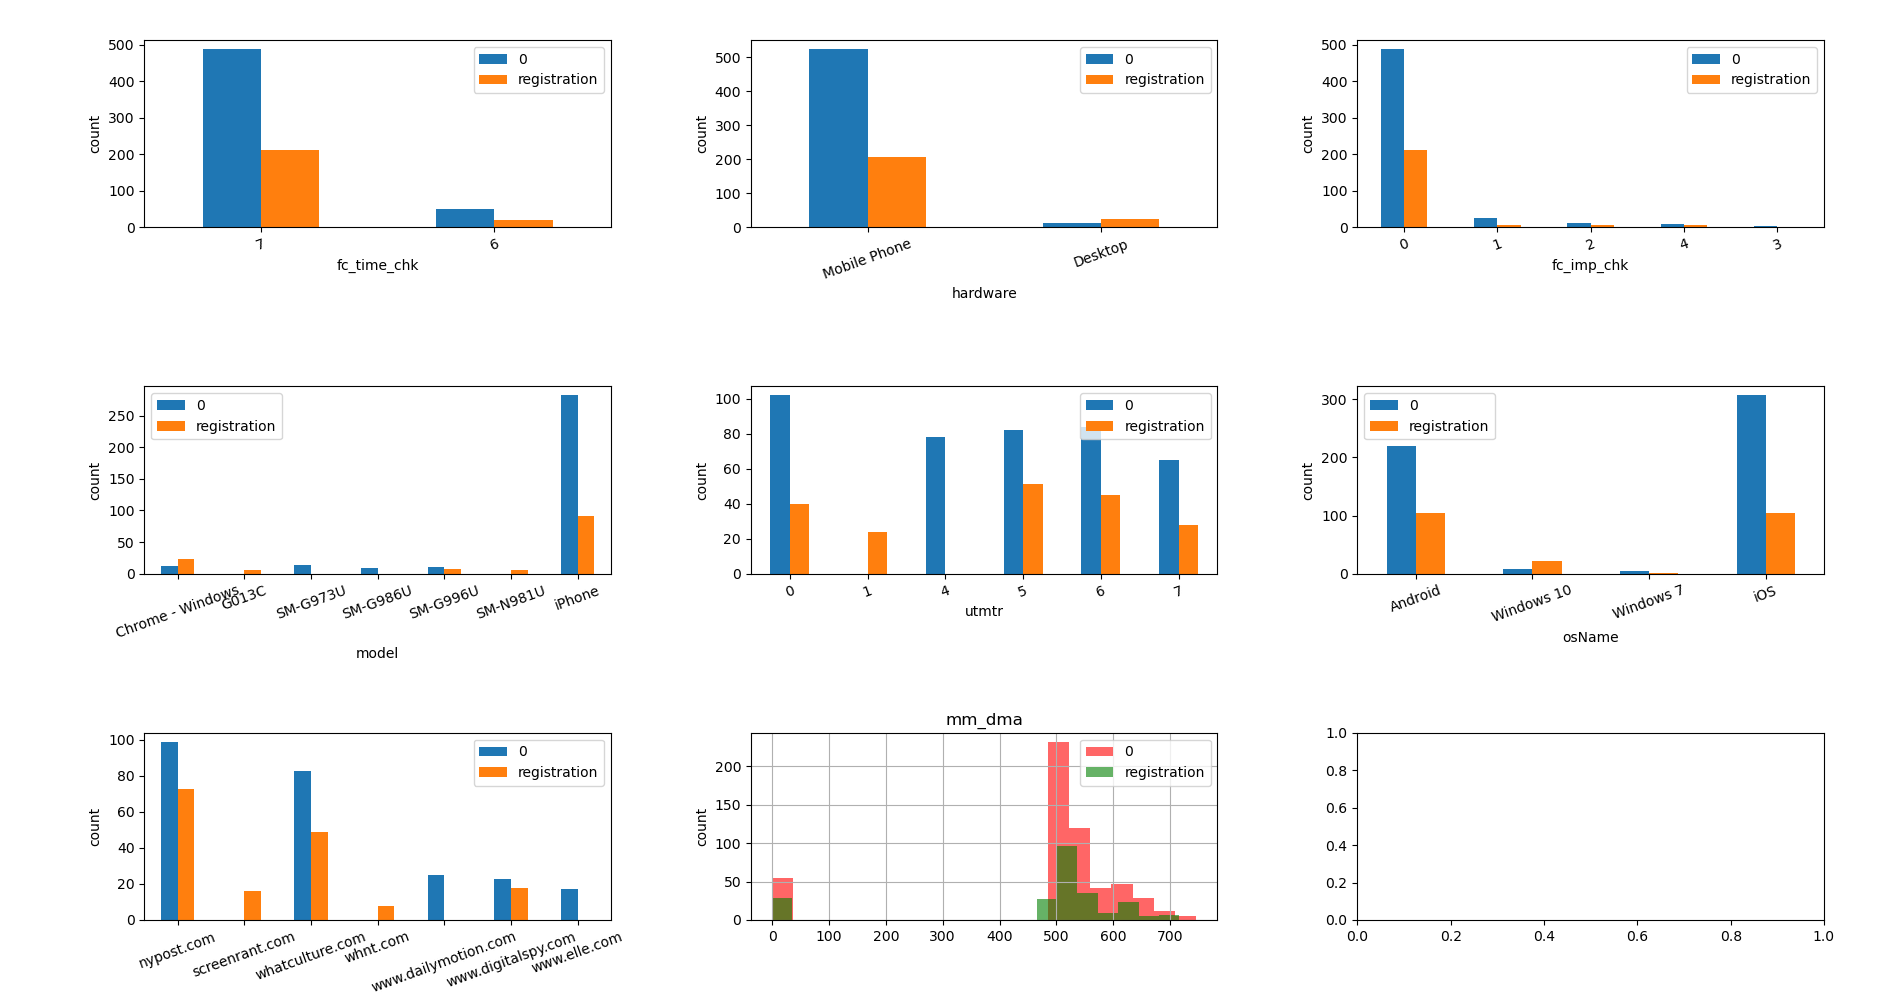

In [1]:
import pandas as pd
from myown_pack.exploring import corr_analysis
from myown_pack.exploring import frequency_analysis
from myown_pack.exploring import describe

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
dfy.drop_duplicates(["uid", "tag"], inplace=True)
dfx = dfx.sample(frac=0.05, random_state=42)
tags = dfy.tag.unique().tolist()
print(tags) # ['fclick', 'vregistration', 'registration', 'vcontent', 'vsignup', 'vmisc', 'vlead', 'signup', 'misc', 'lead', 'content']

tag = 'registration'
# 1) merge x and y
df = pd.merge(dfx, dfy, on="uid", how="left")
# 2) tag nan => 0
df['tag'].fillna(0, inplace=True)
# 3) filter tag != 0 - to filter dfy with tags only
df = df[df['tag'] != 0]
# 4) tag != tag => 0 - to see only one tag and others at background
tags2 = tags.copy()
tags2.remove(tag)
# print(tags2)

df.replace(tags2, 0, inplace=True)
# 5) drop timeline and uid
df.drop(columns=['uid', 'reg_time'], inplace=True)
# 6)
frequency_analysis(df, target='tag', image_save=f'./imgs/no_vs_{tag}.png', t0=0, t1=tag)

### "with tags" vs tag == 'vcontent'



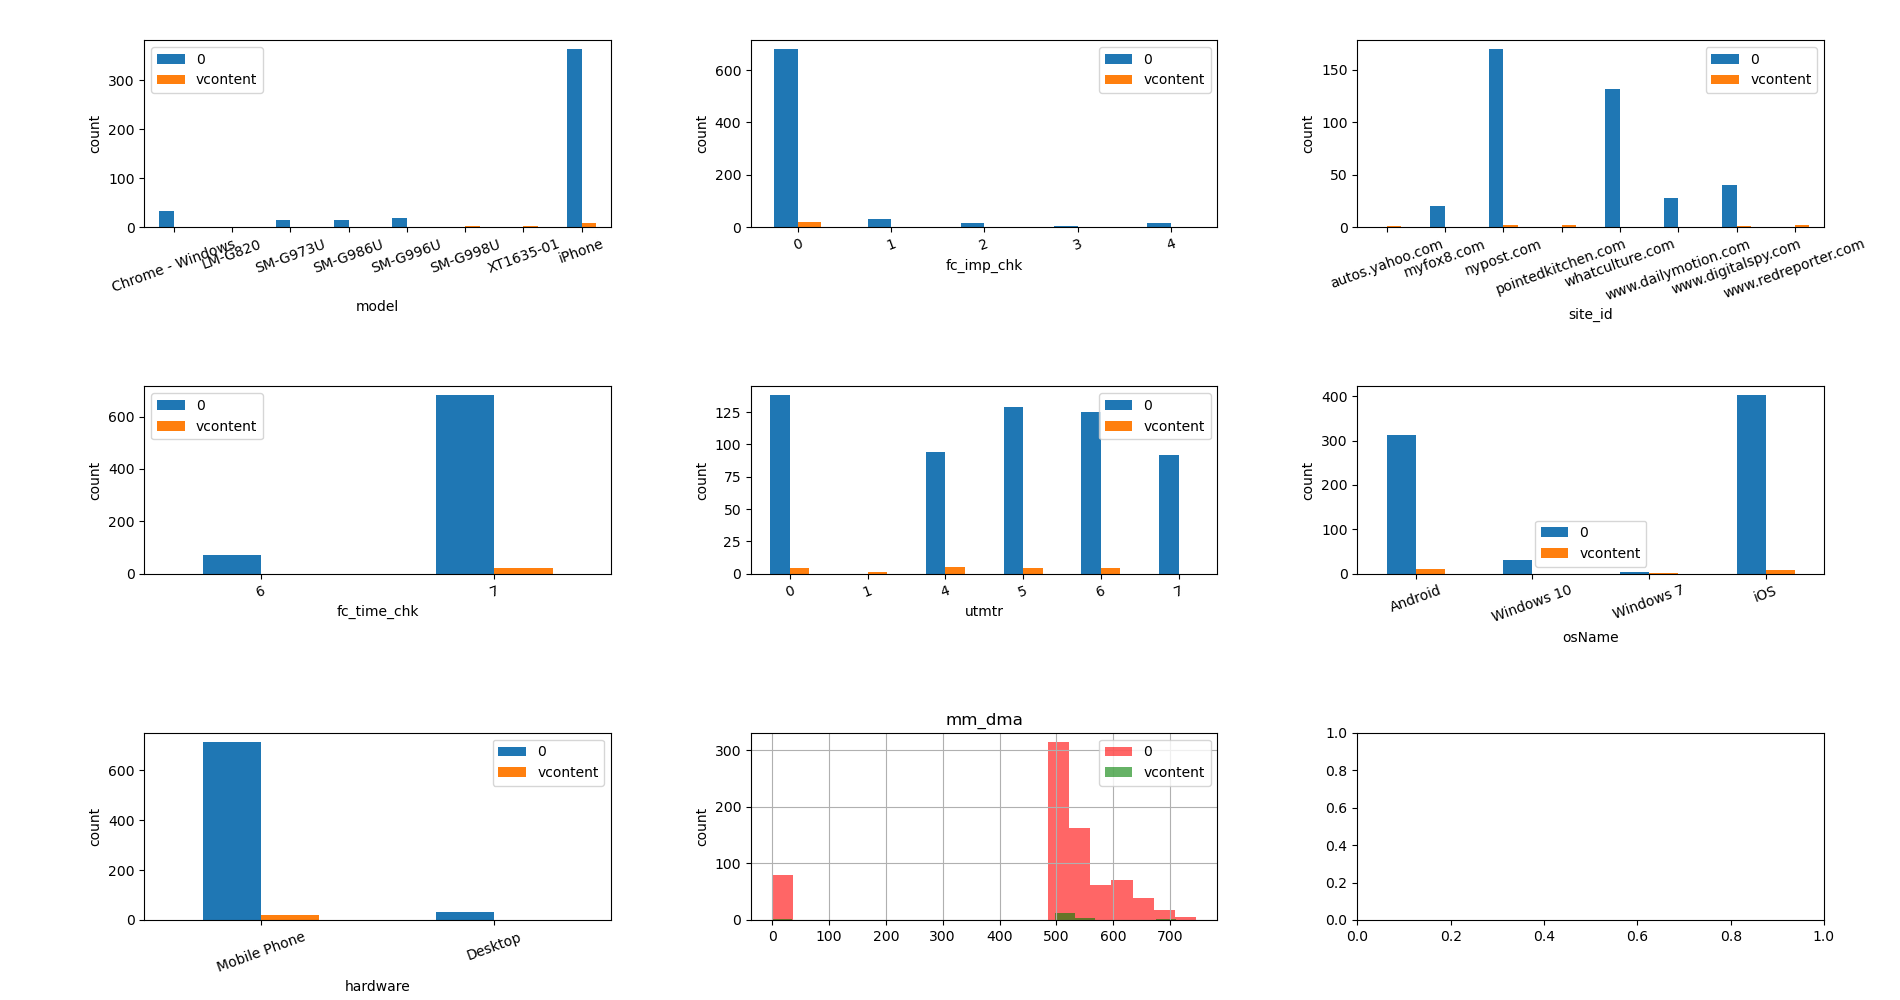

In [1]:
import pandas as pd
from myown_pack.exploring import corr_analysis
from myown_pack.exploring import frequency_analysis
from myown_pack.exploring import describe

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
dfy.drop_duplicates(["uid", "tag"], inplace=True)
dfx = dfx.sample(frac=0.05, random_state=42)
tags = dfy.tag.unique().tolist()
print(tags) # ['fclick', 'vregistration', 'registration', 'vcontent', 'vsignup', 'vmisc', 'vlead', 'signup', 'misc', 'lead', 'content']

tag = 'vcontent'
# 1) merge x and y
df = pd.merge(dfx, dfy, on="uid", how="left")
# 2) tag nan => 0
df['tag'].fillna(0, inplace=True)
# 3) filter tag != 0 - to filter dfy with tags only
df = df[df['tag'] != 0]
# 4) tag != tag => 0 - to see only one tag and others at background
tags2 = tags.copy()
tags2.remove(tag)
# print(tags2)

df.replace(tags2, 0, inplace=True)
# 5) drop timeline and uid
df.drop(columns=['uid', 'reg_time'], inplace=True)
# 6)
frequency_analysis(df, target='tag', image_save=f'./imgs/no_vs_{tag}.png', t0=0, t1=tag)

### "with tags" vs tag == 'vsignup'



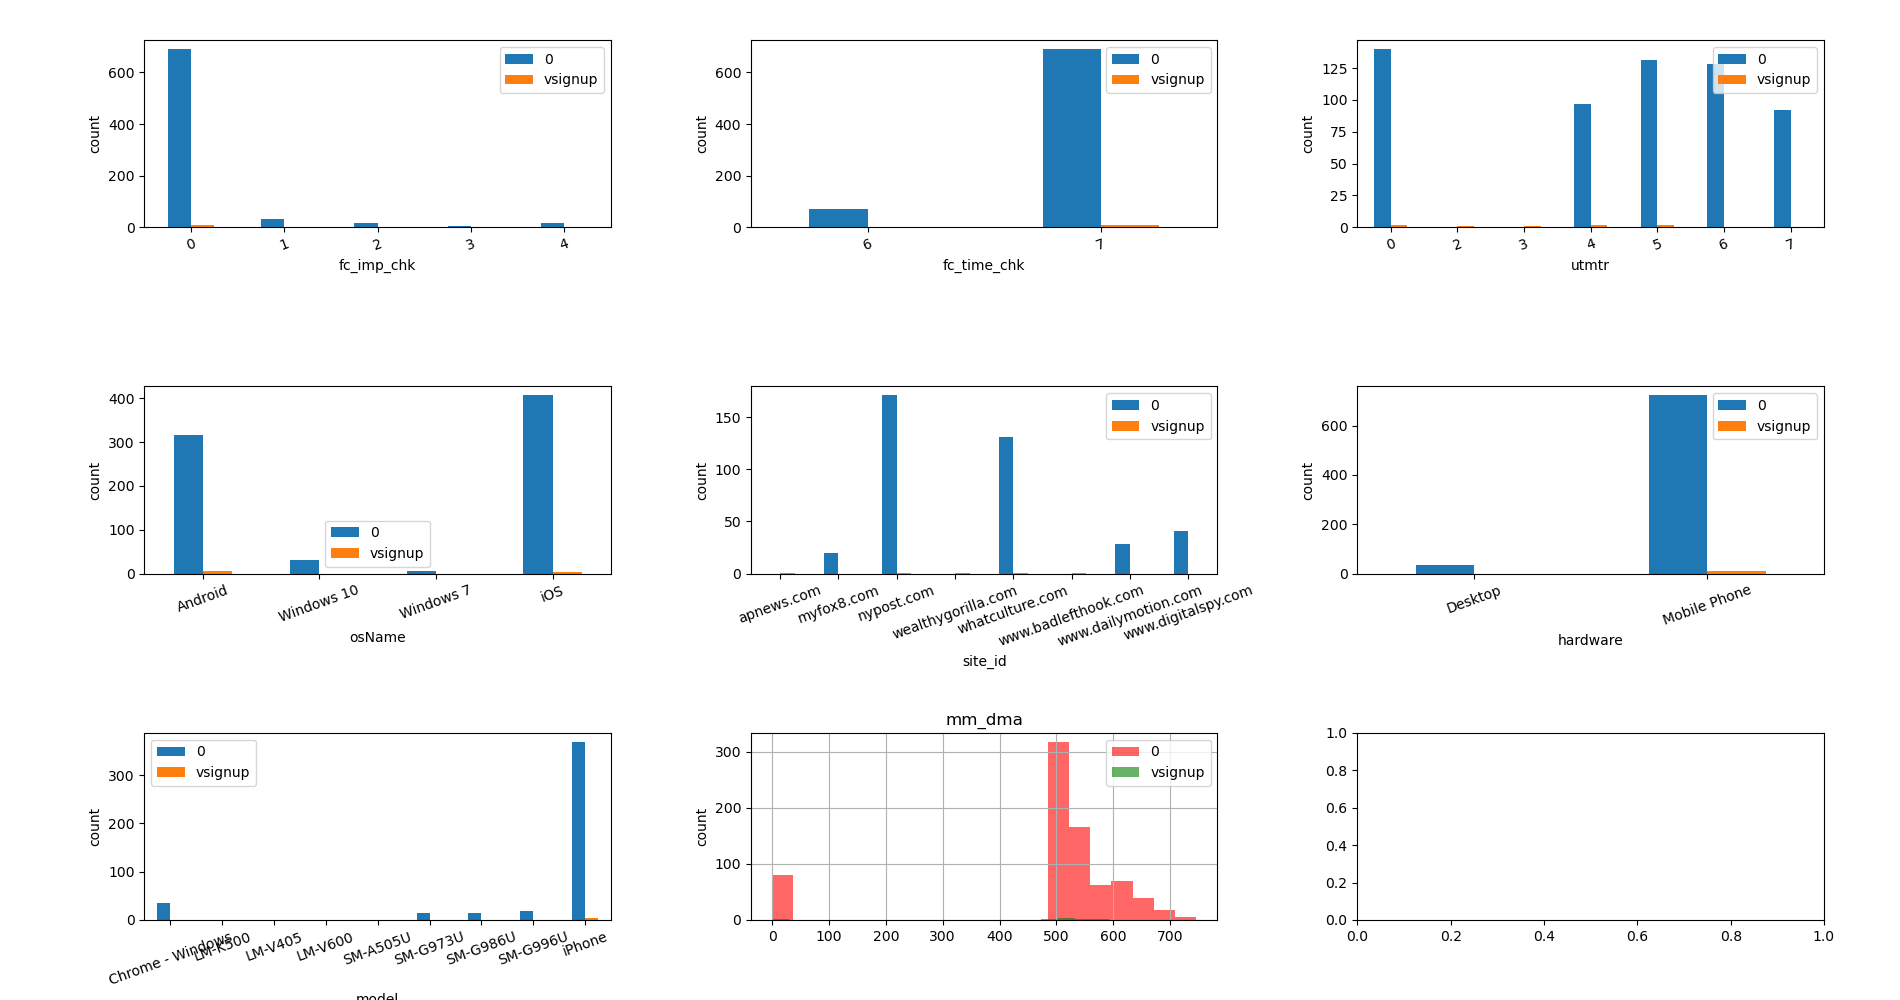

In [1]:
import pandas as pd
from myown_pack.exploring import corr_analysis
from myown_pack.exploring import frequency_analysis
from myown_pack.exploring import describe

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
dfy.drop_duplicates(["uid", "tag"], inplace=True)
dfx = dfx.sample(frac=0.05, random_state=42)
tags = dfy.tag.unique().tolist()
print(tags) # ['fclick', 'vregistration', 'registration', 'vcontent', 'vsignup', 'vmisc', 'vlead', 'signup', 'misc', 'lead', 'content']

tag = 'vsignup'
# 1) merge x and y
df = pd.merge(dfx, dfy, on="uid", how="left")
# 2) tag nan => 0
df['tag'].fillna(0, inplace=True)
# 3) filter tag != 0 - to filter dfy with tags only
df = df[df['tag'] != 0]
# 4) tag != tag => 0 - to see only one tag and others at background
tags2 = tags.copy()
tags2.remove(tag)
# print(tags2)

df.replace(tags2, 0, inplace=True)
# 5) drop timeline and uid
df.drop(columns=['uid', 'reg_time'], inplace=True)
# 6)
frequency_analysis(df, target='tag', image_save=f'./imgs/no_vs_{tag}.png', t0=0, t1=tag)

### "with tags" vs tag == 'vmisc'



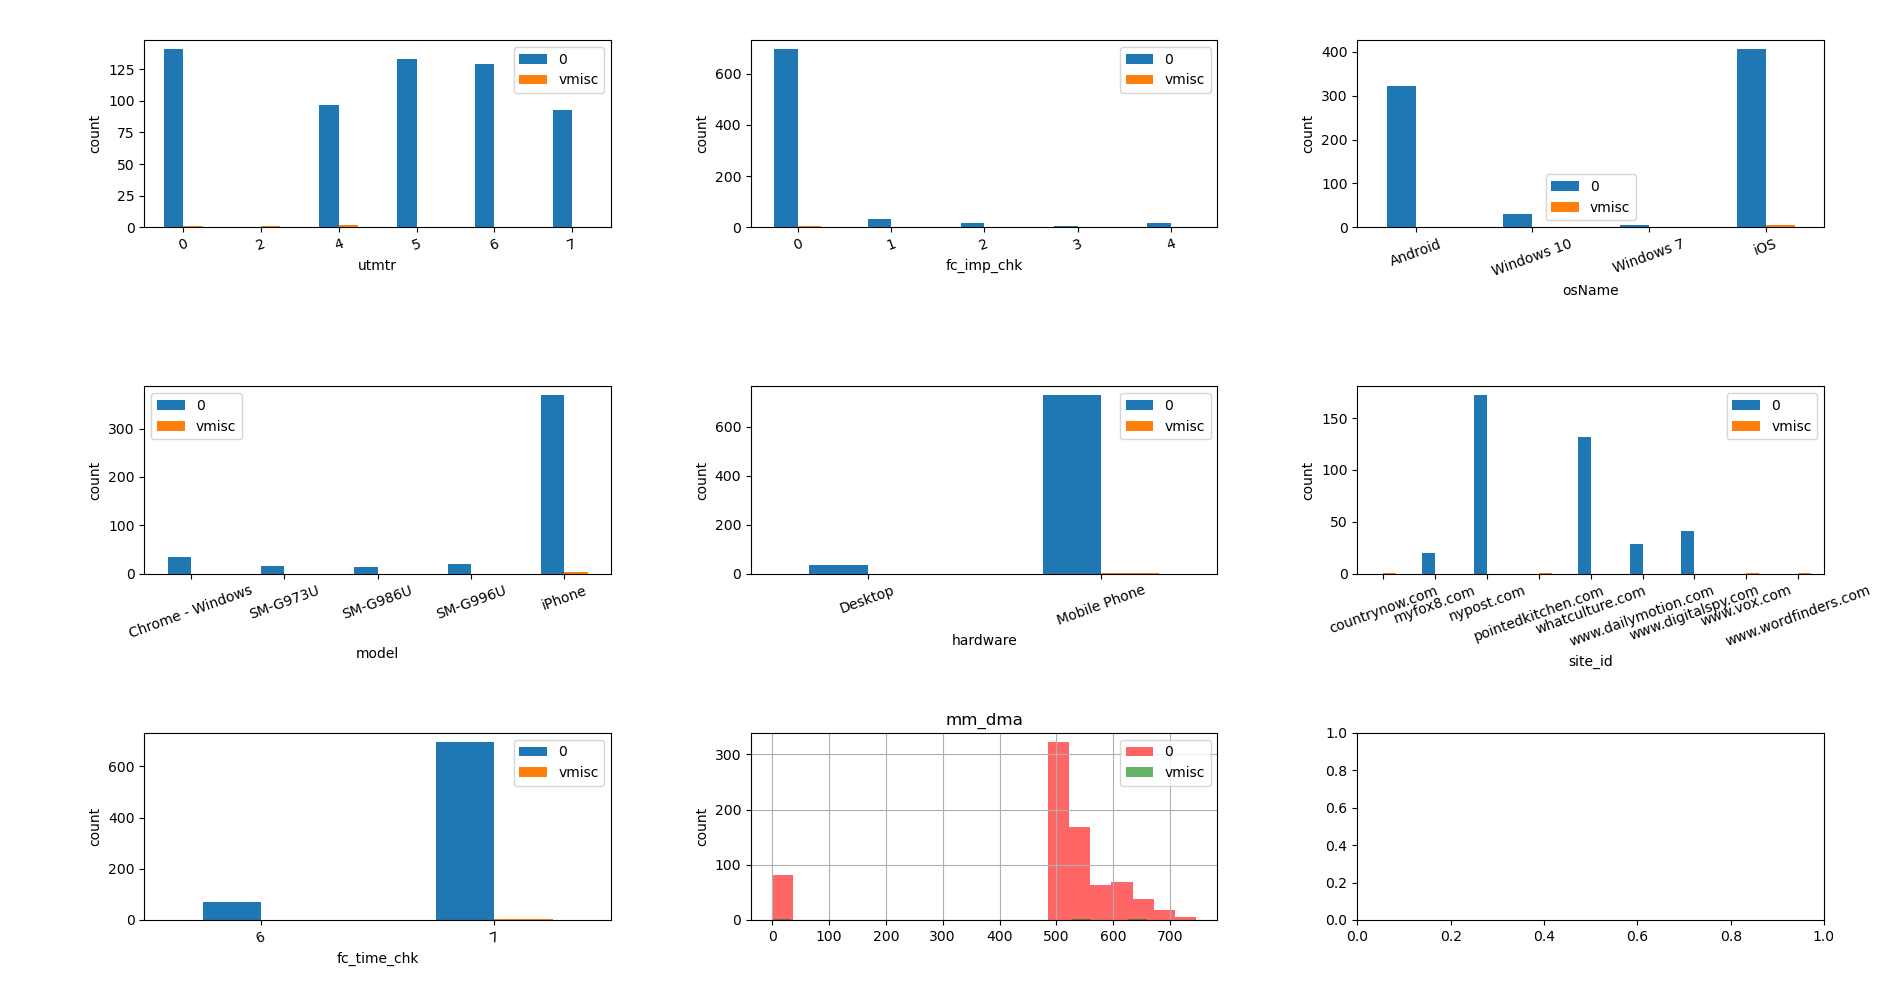

In [1]:
import pandas as pd
from myown_pack.exploring import corr_analysis
from myown_pack.exploring import frequency_analysis
from myown_pack.exploring import describe

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
dfy.drop_duplicates(["uid", "tag"], inplace=True)
dfx = dfx.sample(frac=0.05, random_state=42)
tags = dfy.tag.unique().tolist()
print(tags) # ['fclick', 'vregistration', 'registration', 'vcontent', 'vsignup', 'vmisc', 'vlead', 'signup', 'misc', 'lead', 'content']

tag = 'vmisc'
# 1) merge x and y
df = pd.merge(dfx, dfy, on="uid", how="left")
# 2) tag nan => 0
df['tag'].fillna(0, inplace=True)
# 3) filter tag != 0 - to filter dfy with tags only
df = df[df['tag'] != 0]
# 4) tag != tag => 0 - to see only one tag and others at background
tags2 = tags.copy()
tags2.remove(tag)
# print(tags2)

df.replace(tags2, 0, inplace=True)
# 5) drop timeline and uid
df.drop(columns=['uid', 'reg_time'], inplace=True)
# 6)
frequency_analysis(df, target='tag', image_save=f'./imgs/no_vs_{tag}.png', t0=0, t1=tag)

### "with tags" vs tag == 'vlead'



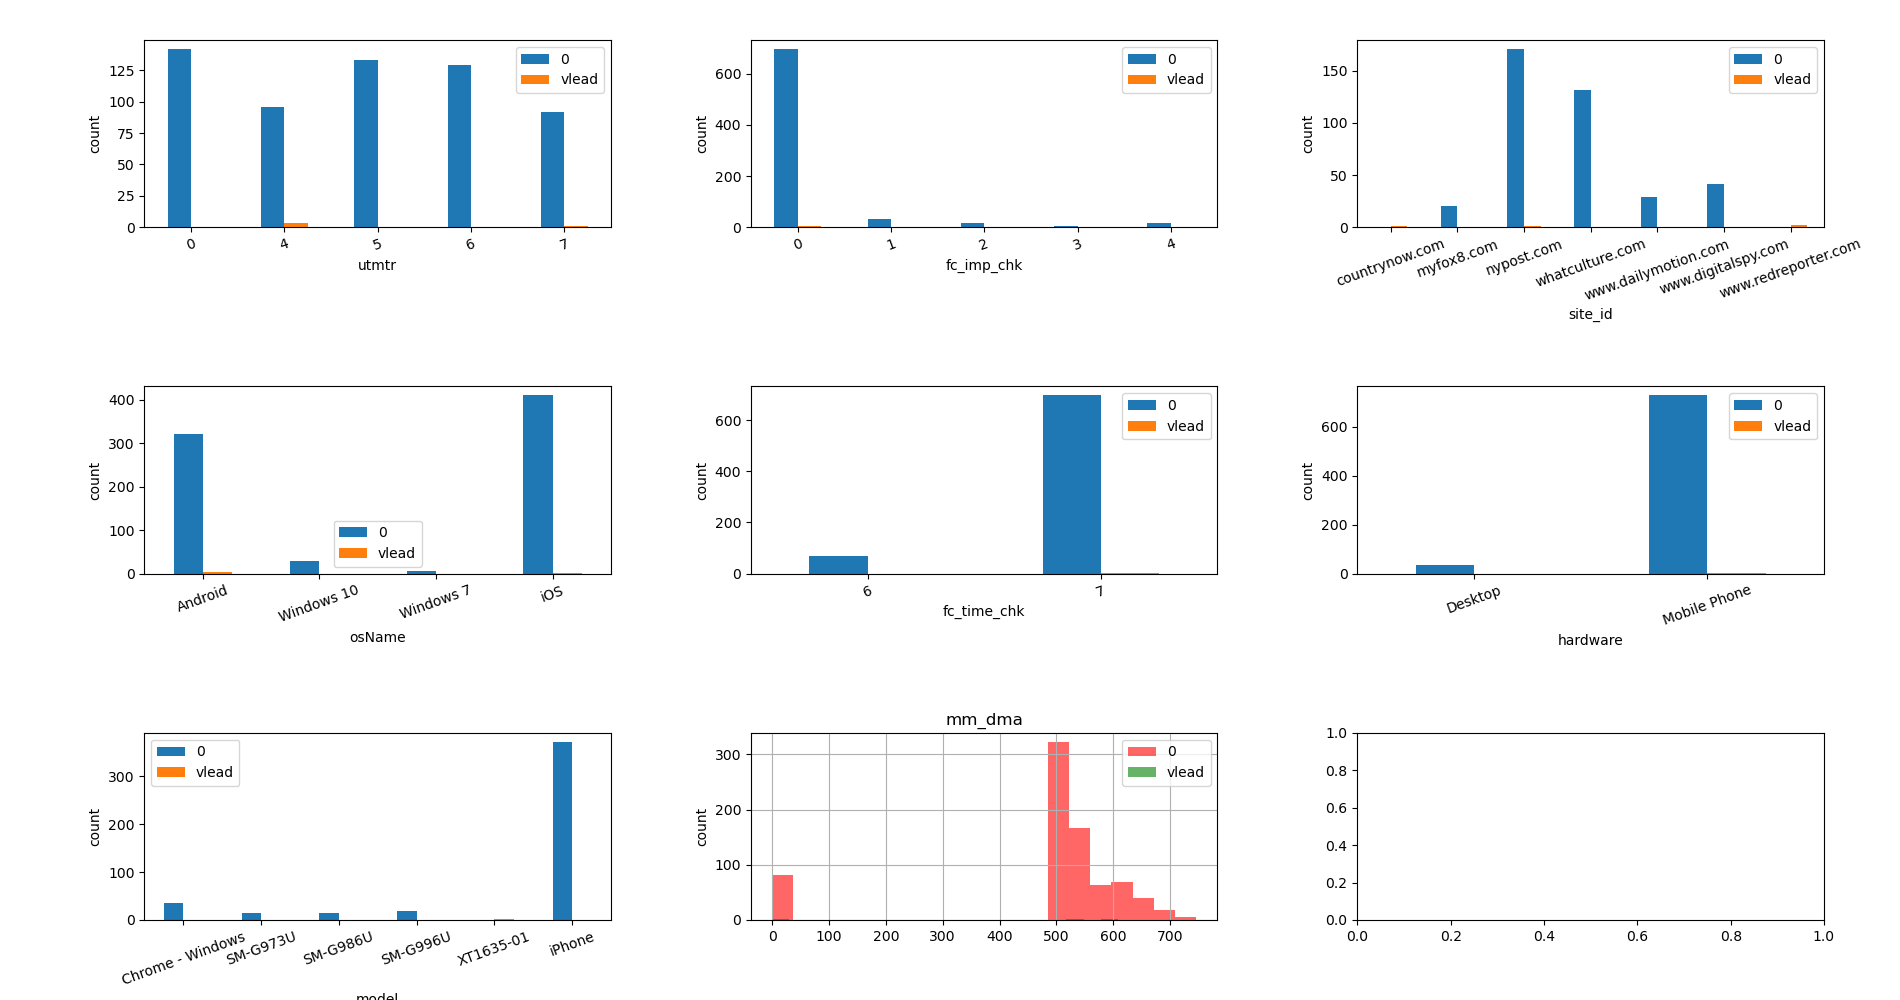

In [1]:
import pandas as pd
from myown_pack.exploring import corr_analysis
from myown_pack.exploring import frequency_analysis
from myown_pack.exploring import describe

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
dfy.drop_duplicates(["uid", "tag"], inplace=True)
dfx = dfx.sample(frac=0.05, random_state=42)
tags = dfy.tag.unique().tolist()
print(tags) # ['fclick', 'vregistration', 'registration', 'vcontent', 'vsignup', 'vmisc', 'vlead', 'signup', 'misc', 'lead', 'content']

tag = 'vlead'
# 1) merge x and y
df = pd.merge(dfx, dfy, on="uid", how="left")
# 2) tag nan => 0
df['tag'].fillna(0, inplace=True)
# 3) filter tag != 0 - to filter dfy with tags only
df = df[df['tag'] != 0]
# 4) tag != tag => 0 - to see only one tag and others at background
tags2 = tags.copy()
tags2.remove(tag)
# print(tags2)

df.replace(tags2, 0, inplace=True)
# 5) drop timeline and uid
df.drop(columns=['uid', 'reg_time'], inplace=True)
# 6)
frequency_analysis(df, target='tag', image_save=f'./imgs/no_vs_{tag}.png', t0=0, t1=tag)

### "with tags" vs tag == 'signup'



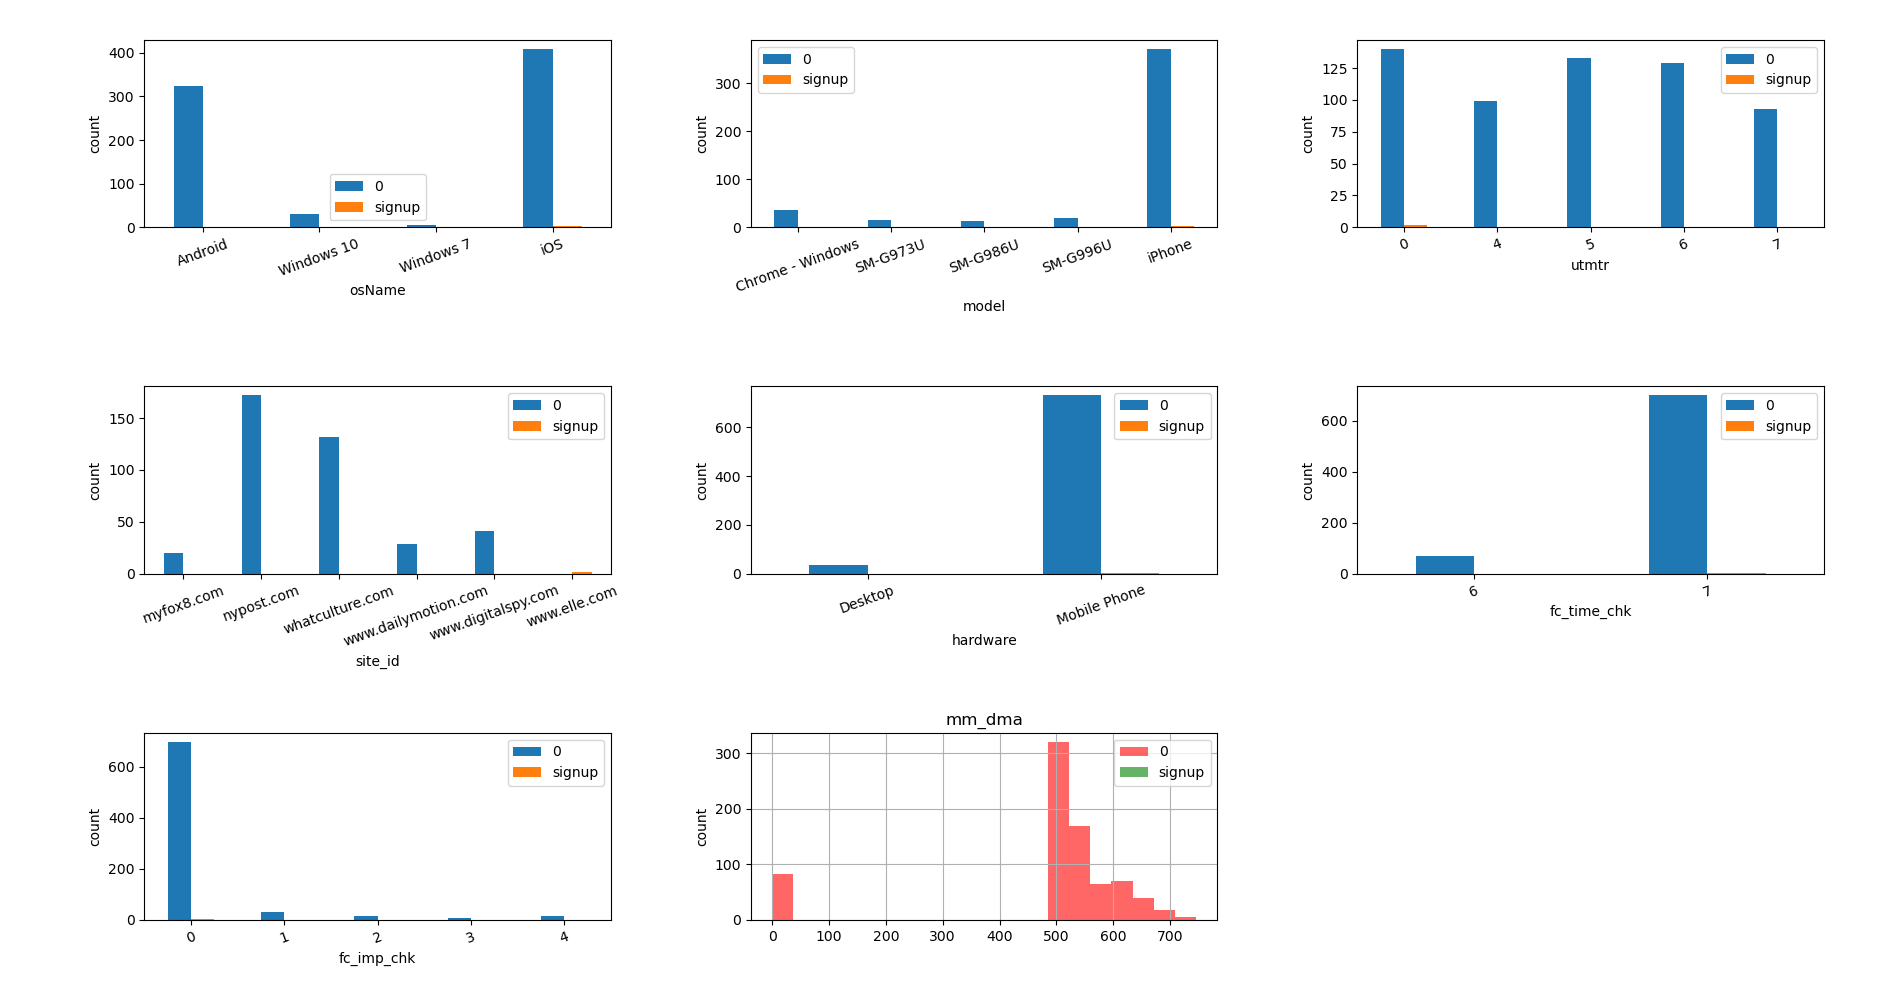

In [1]:
import pandas as pd
from myown_pack.exploring import corr_analysis
from myown_pack.exploring import frequency_analysis
from myown_pack.exploring import describe

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
dfy.drop_duplicates(["uid", "tag"], inplace=True)
dfx = dfx.sample(frac=0.05, random_state=42)
tags = dfy.tag.unique().tolist()
print(tags) # ['fclick', 'vregistration', 'registration', 'vcontent', 'vsignup', 'vmisc', 'vlead', 'signup', 'misc', 'lead', 'content']

tag = 'signup'
# 1) merge x and y
df = pd.merge(dfx, dfy, on="uid", how="left")
# 2) tag nan => 0
df['tag'].fillna(0, inplace=True)
# 3) filter tag != 0 - to filter dfy with tags only
df = df[df['tag'] != 0]
# 4) tag != tag => 0 - to see only one tag and others at background
tags2 = tags.copy()
tags2.remove(tag)
# print(tags2)

df.replace(tags2, 0, inplace=True)
# 5) drop timeline and uid
df.drop(columns=['uid', 'reg_time'], inplace=True)
# 6)
frequency_analysis(df, target='tag', image_save=f'./imgs/no_vs_{tag}.png', t0=0, t1=tag)

### "with tags" vs tag == 'misc'



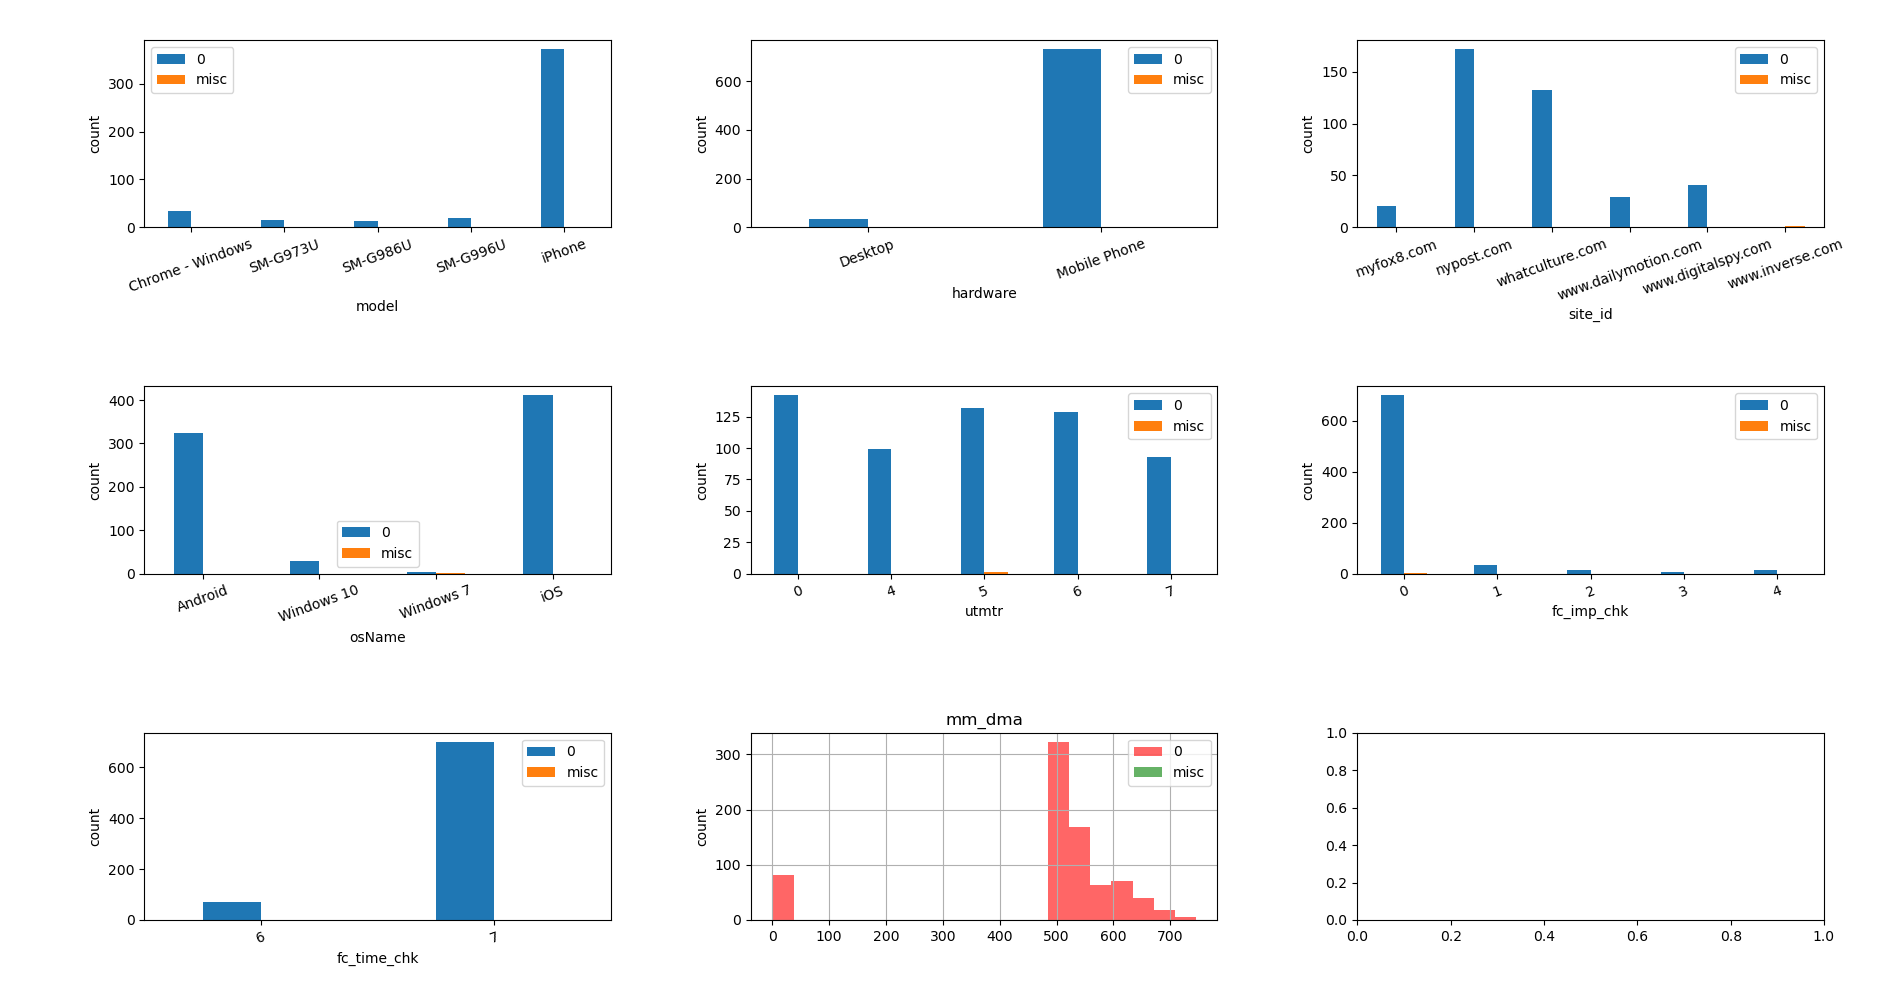

In [1]:
import pandas as pd
from myown_pack.exploring import corr_analysis
from myown_pack.exploring import frequency_analysis
from myown_pack.exploring import describe

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
dfy.drop_duplicates(["uid", "tag"], inplace=True)
dfx = dfx.sample(frac=0.05, random_state=42)
tags = dfy.tag.unique().tolist()
print(tags) # ['fclick', 'vregistration', 'registration', 'vcontent', 'vsignup', 'vmisc', 'vlead', 'signup', 'misc', 'lead', 'content']

tag = 'misc'
# 1) merge x and y
df = pd.merge(dfx, dfy, on="uid", how="left")
# 2) tag nan => 0
df['tag'].fillna(0, inplace=True)
# 3) filter tag != 0 - to filter dfy with tags only
df = df[df['tag'] != 0]
# 4) tag != tag => 0 - to see only one tag and others at background
tags2 = tags.copy()
tags2.remove(tag)
# print(tags2)

df.replace(tags2, 0, inplace=True)
# 5) drop timeline and uid
df.drop(columns=['uid', 'reg_time'], inplace=True)
# 6)
frequency_analysis(df, target='tag', image_save=f'./imgs/no_vs_{tag}.png', t0=0, t1=tag)

### "with tags" vs tag == 'lead'



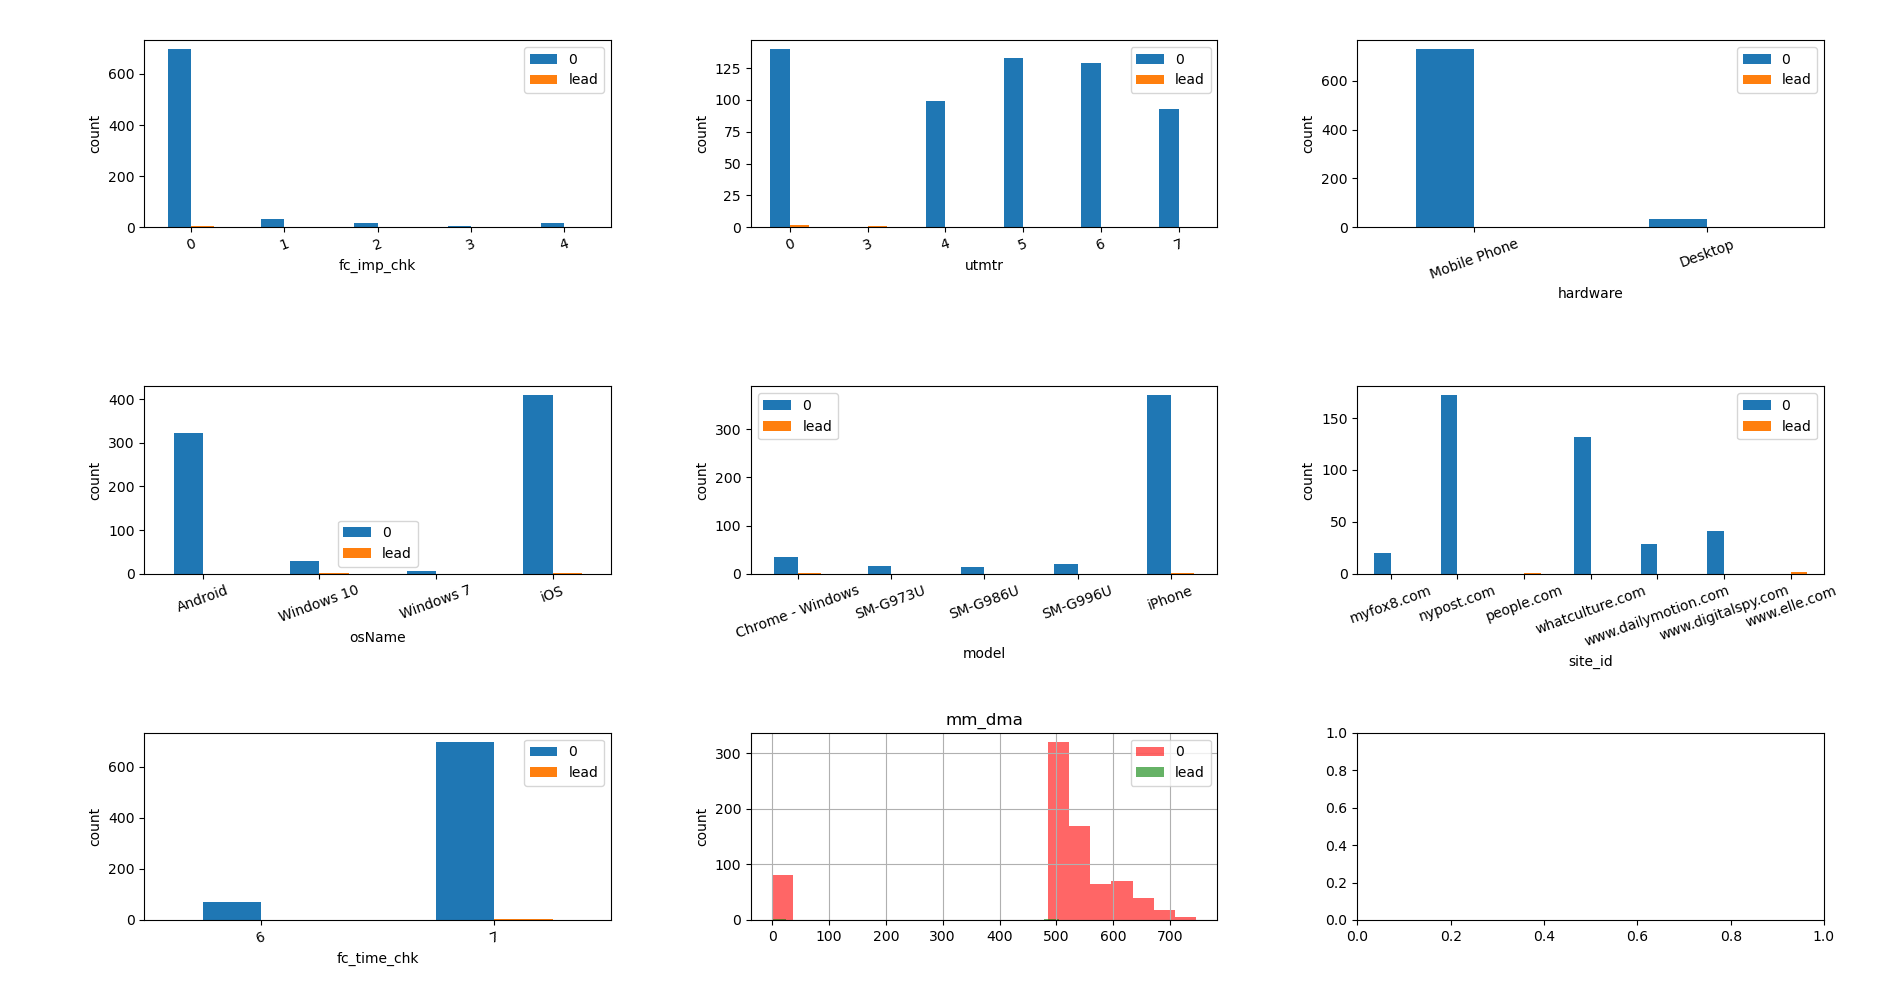

In [1]:
import pandas as pd
from myown_pack.exploring import corr_analysis
from myown_pack.exploring import frequency_analysis
from myown_pack.exploring import describe

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
dfy.drop_duplicates(["uid", "tag"], inplace=True)
dfx = dfx.sample(frac=0.05, random_state=42)
tags = dfy.tag.unique().tolist()
print(tags) # ['fclick', 'vregistration', 'registration', 'vcontent', 'vsignup', 'vmisc', 'vlead', 'signup', 'misc', 'lead', 'content']

tag = 'lead'
# 1) merge x and y
df = pd.merge(dfx, dfy, on="uid", how="left")
# 2) tag nan => 0
df['tag'].fillna(0, inplace=True)
# 3) filter tag != 0 - to filter dfy with tags only
df = df[df['tag'] != 0]
# 4) tag != tag => 0 - to see only one tag and others at background
tags2 = tags.copy()
tags2.remove(tag)
# print(tags2)

df.replace(tags2, 0, inplace=True)
# 5) drop timeline and uid
df.drop(columns=['uid', 'reg_time'], inplace=True)
# 6)
frequency_analysis(df, target='tag', image_save=f'./imgs/no_vs_{tag}.png', t0=0, t1=tag)

### "with tags" vs tag == 'content'



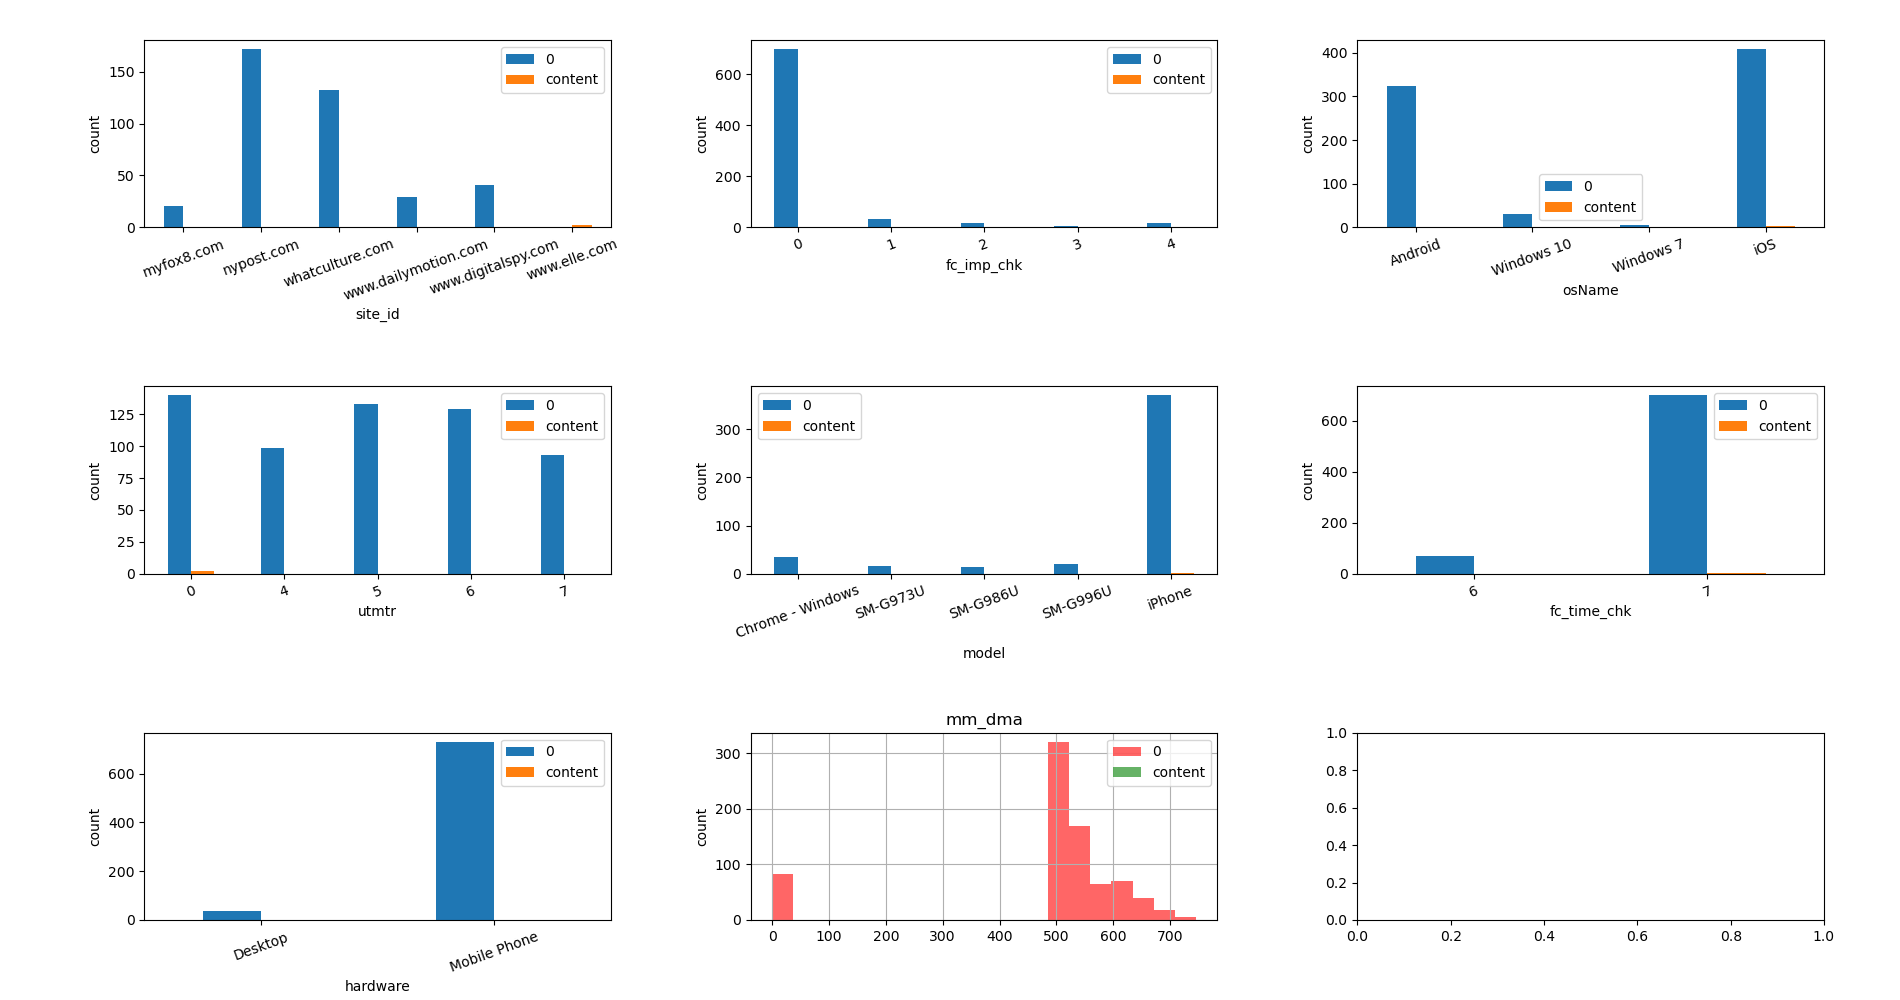

In [1]:
import pandas as pd
from myown_pack.exploring import corr_analysis
from myown_pack.exploring import frequency_analysis
from myown_pack.exploring import describe

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')
dfy.drop_duplicates(["uid", "tag"], inplace=True)
dfx = dfx.sample(frac=0.05, random_state=42)
tags = dfy.tag.unique().tolist()
print(tags) # ['fclick', 'vregistration', 'registration', 'vcontent', 'vsignup', 'vmisc', 'vlead', 'signup', 'misc', 'lead', 'content']

tag = 'content'
# 1) merge x and y
df = pd.merge(dfx, dfy, on="uid", how="left")
# 2) tag nan => 0
df['tag'].fillna(0, inplace=True)
# 3) filter tag != 0 - to filter dfy with tags only
df = df[df['tag'] != 0]
# 4) tag != tag => 0 - to see only one tag and others at background
tags2 = tags.copy()
tags2.remove(tag)
# print(tags2)

df.replace(tags2, 0, inplace=True)
# 5) drop timeline and uid
df.drop(columns=['uid', 'reg_time'], inplace=True)
# 6)
frequency_analysis(df, target='tag', image_save=f'./imgs/no_vs_{tag}.png', t0=0, t1=tag)

## prediction



We will solve task "Probability of fclick" by binary classification
 with output calibration.

steps:

1.  prepare data
2.  select metric
3.  select model
4.  model finetuning



### prepare data



The plan:

1.  Compose result data from merge vertically:
    1.  all y uids records.
    2.  0.06 percent of other data.
2.  pre\_process: select rows we require, prepare major columns, join dataframes
3.  process\_by\_handes: check unbalanced and empty columns, remove
    columns, correct types, unite columns, feature engineering,
4.  split to train and test
5.  train: remove outlieners in numerical columns
6.  fill nan values - train and test
7.  encode categorical and fix sparse classes
    1.  select frequence to fix sparse classes

Degree of imbalance: 3044/52296=0.06 - "Extreme" imbalance.



In [1]:
import pandas as pd
from myown_pack.common import outliers_numerical
from myown_pack.common import fill_na
from myown_pack.common import sparse_classes
from myown_pack.common import split
from myown_pack.common import encode_categorical_pipe
from myown_pack.common import load
from myown_pack.exploring import describe
from myown_pack.common import values_byfreq

dfx = pd.read_csv('interview.X.csv')
dfy = pd.read_csv('interview.y.csv')

# ------- 1. Compose result data from merge vertically
# - y: drop duplicates
dfy.drop_duplicates(["uid", "tag"], inplace=True)
print("dfy['tag'].value_counts():")
print(dfy['tag'].value_counts())
# - first part of join 1): merge y and x - join dataframes horizontally
df1 = pd.merge(dfy, dfx, on="uid", how="inner")
print("df1", df1.columns)
print("df1['tag'].value_counts()")
print(df1['tag'].value_counts())
describe(df1, "df1")
# - mark records in X that not exist in first part (1))
df_all = dfx.merge(df1.drop_duplicates(), on=['uid'],
                   how='left', indicator=True,
                   suffixes=[None, '_ycolumn'])
print("df_all.columns:", df_all.columns)
print()
# - select not exist records
df_all_not = df_all[df_all['_merge'] == 'left_only']
# - drop "merge" columns
df_all_not = df_all_not[[c for c in df_all_not.columns if not c.endswith('_ycolumn')]]
df_all_not.drop(columns=['_merge'], inplace=True)
# - get 0.06 part, this is 2)
df_all_not = df_all_not.sample(frac=0.06, random_state=42)
print("df_all_not", df_all_not.describe())
print("df_all_not", df_all_not.columns)
describe(df_all_not, "df_all_not")
# - merge vertically (1)) and (2))
df = pd.concat([df1, df_all_not], axis=0, ignore_index=True)
describe(df, "df")

# # ------- 2. pre_process
# - major column: nan -> 0
df['tag'].fillna(0, inplace=True)
# - drop uid
df.drop(columns=['uid'], inplace=True)
# - tag: fclick, other -> 0
tags = df.tag.unique().tolist()
tag = 'fclick'
tags2 = tags.copy()
tags2.remove(tag)
df.replace(tags2, 0, inplace=True)
# - tag: fclick -> 1
df.replace('fclick', 1, inplace=True)
# - reset pandas index
df.reset_index(drop=True, inplace=True)
describe(df, "df_final")
print(df.dtypes)
# ------- 3. process_by_handes: check unbalanced and empty columns, remove
# ------- columns, correct types, unite columns, feature engineering,
# - correct types
df['reg_time'] = pd.to_datetime(df['reg_time'])
# - feature engineering
df['dayofweek'] = df.reg_time.dt.dayofweek
df['hour'] = df.reg_time.dt.hour
df['month'] = df.reg_time.dt.month
df['quarter'] = df.reg_time.dt.quarter
# - remove columns
df.drop(columns=['reg_time'], inplace=True)
# - correct types
# print(df.dtypes)
# ------- 4. split to train and test and save indexes
p1 = 'split_train.pickle'
p2 = 'split_test.pickle'
split(df, p1, p2, target_col='tag')  # and select columns, remove special cases, save id
# ------- 5. train: remove outlieners in numerical columns
p1 = outliers_numerical(p1, 0.0006, target='tag',
                            ignore_columns=[])  # require fill_na for skew test

# ------- 6. fill NaN values with mode
p1 = fill_na(p1, 'fill_na_p1.pickle', id_check1='id_train.pickle')
p1 = 'fill_na_p1.pickle'
p2 = fill_na(p2, 'fill_na_p2.pickle', id_check1='id_test.pickle')
p2 = 'fill_na_p2.pickle'
# ------- 7. encode categorical
# - select frequence to fix sparse classes
df = load(p1)

for c in df.columns:
    l, h = values_byfreq(df[c], min_freq=0.005)
    # print(l, h)
    print(len(l), len(h))
    print()

p1, encoders = encode_categorical_pipe(p1, id_check='id_train.pickle',
                                       p_save='train.pickle',
                                       min_frequency=0.005)  # 1 or 0 # fill_na required
# print(p1, encoders)
p1 = 'train.pickle'
p2, encoders = encode_categorical_pipe(p2, id_check='id_test.pickle',
                                             encoders_train=encoders,
                                             p_save='test.pickle')  # 1 or 0 # fill_na required
# # print("p2", p2)
# p2 = 'test.pickle'
df = load(p1)
print(df['tag'].value_counts())
# describe(df, 'p2')

#+begin_example
dfy['tag'].value_counts():
tag
vregistration    5493
fclick           3780
registration     2380
vcontent          455
vsignup           229
vlead              63
vmisc              42
signup             17
content            12
misc                3
lead                3
Name: count, dtype: int64
df1 Index(['uid', 'tag', 'reg_time', 'fc_imp_chk', 'fc_time_chk', 'utmtr',
       'mm_dma', 'osName', 'model', 'hardware', 'site_id'],
      dtype='object')
df1['tag'].value_counts()
tag
vregistration    5462
fclick           3808
registration     2394
vcontent          451
vsignup           225
vlead              63
vmisc              42
signup             17
content            11
lead                5
misc                4
Name: count, dtype: int64
describe df1:
         fc_imp_chk   fc_time_chk         utmtr        mm_dma
count  12482.000000  12482.000000  12482.000000  12482.000000
mean       0.214228      6.902660      3.497917    509.229130
std        0.763163      0.296

### zero classifier



We have highly skewed class distributions.
It is unbalanced classification.



In [1]:
import pandas as pd
from sklearn.dummy import DummyClassifier

# dfx = pd.read_csv('interview.X.csv')
# dfy = pd.read_csv('interview.y.csv')
p1 = 'train.pickle'
df = load(p1)
print(df.shape)
# dfx = dfx.sample(frac=0.05, random_state=42)
print(df.head(5).to_string())
y = df['tag']
X = df.drop(columns=['tag'])
# print(X.columns.tolist())
# print(y)
# ----------- select metrics 1) dummy ----

dummy_clf = DummyClassifier()
dummy_clf.fit(X, y)
dummy_clf.predict(X)
print("predict", dummy_clf.predict(X))
print("score", dummy_clf.score(X, y))
print('---')
v = dummy_clf.predict(X)
print(sum(v))

#+begin_example
(55340, 55)
   tag  fc_imp_chk  fc_time_chk  utmtr  mm_dma  dayofweek  hour  month  quarter  osName  hardware  model_SM-G960U  model_SM-G965U  model_SM-G970U  model_SM-G973U  model_SM-G975U  model_SM-G986U  model_SM-G991U  model_SM-G998U  model_SM-N975U  model_SM-N986U  model_iPhone  model_iPhone 11  model_iPhone 11 Pro Max  model_iPhone 12  model_iPhone 12 Pro  model_iPhone 12 Pro Max  model_iPhone 8 Plus  model_iPhone XR  model_other  site_id_currently.att.yahoo.com  site_id_finance.yahoo.com  site_id_heavy.com  site_id_hu.motorsport.com  site_id_metropcs.mobileposse.com  site_id_my.xfinity.com  site_id_myfox8.com  site_id_news.yahoo.com  site_id_nypost.com  site_id_people.com  site_id_stocktwits.com  site_id_tbc.wowhead.com  site_id_thespun.com  site_id_whatculture.com  site_id_whnt.com  site_id_www.dailymotion.com  site_id_www.digitalspy.com  site_id_www.elle.com  site_id_www.foxbusiness.com  site_id_www.stltoday.com  site_id_www.wane.com  site_id_www.woodtv.com  si

### oversampling with SMOTE



SMOTE: Synthetic Minority Over-sampling Technique [https://arxiv.org/abs/1106.1813](https://arxiv.org/abs/1106.1813)



In [1]:
import numpy as np
# from random import randrange, choice
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import MDS # slow
from sklearn.preprocessing import StandardScaler # fast

TOLERANCE = 5
p = float(10**TOLERANCE)
def my_round_5(some_float):
    return int(some_float * p + 0.5)/p

def SMOTE(T, N:int, k:int):
    """
    Returns (N/100) * n_minority_samples synthetic minority samples.

    Parameters
    ----------
    T : array-like, shape = [n_minority_samples, n_features]
        Holds the minority samples
    N : percetange of new synthetic samples:
        n_synthetic_samples = N/100 * n_minority_samples. Can be < 100.
    k : int. Number of nearest neighbours.

    Returns
    -------
    S : array, shape = [(N/100) * n_minority_samples, n_features]
    """
    # - no scaling
    # TFIXED = T
    # # - create scaled or dirensionaly reducted dataset, to fight mixed data types
    TFIXED = StandardScaler(copy=False, with_mean=False).fit_transform(T)
    # # - slow alternative
    # embedding = MDS(n_components=2, metric=False, normalized_stress='auto')
    # TFIXED = embedding.fit_transform(T)

    n_minority_samples, n_features = T.shape # rows, columns

    if N < 100:
        #create synthetic samples only for a subset of T.
        #TODO: select random minortiy samples
        N = 100
        pass

    if (N % 100) != 0:
        raise ValueError("N must be < 100 or multiple of 100")

    NN = N//100
    print(N/100, n_minority_samples)
    n_synthetic_samples = round(NN * n_minority_samples) # 20%
    print(n_synthetic_samples, n_features)
    S = np.zeros(shape=(n_synthetic_samples, n_features))
    print("S.shape", S.shape)

    # - Learn nearest neighbours
    neigh = NearestNeighbors(n_neighbors = k)
    neigh.fit(TFIXED)

    print("n_minority_samples", n_minority_samples) # i - 0-> rows
    print("N", N) # n - 0 -> N
    # - for each source row
    for i in range(n_minority_samples): # per rows in source
        # - get most same rows
        nn = neigh.kneighbors([TFIXED[i]], return_distance=False)
        # - repeat for how many we need
        for n in range(NN): # 2
            # - what row we will copy
            # nn_index = nn[0][k-n-1]
            nn_index = nn[0][np.random.randint(1, k-1)]
            #NOTE: nn includes T[i], we don't want to select it
            # c = k-1
            # while nn_index == i:
            #     # nn_index = choice(nn[0])
            # - new row will be between this and same one.
            dif = T[nn_index] - T[i] # row
            gap = np.random.random()
            # [i,:] - row
            S[i*NN + n, :] = T[i,:] + gap * dif[:]
            # S[n + i, :] = T.iloc[i].to_numpy() + gap * dif[:]
            # -i -n1
            #    -n2
            # -i -n1 2+1
            #    -n2
    return S

import pandas as pd
# own
from myown_pack.common import load
from myown_pack.common import save
from myown_pack.exploring import describe

p1 = 'train.pickle'
p2 = 'test.pickle'
df = load(p1)
df_small = df[df['tag'] == 1]
df_small = df_small.drop(columns=['tag'], inplace=False)
# a = df_small[:1000].copy()

smote_result = SMOTE(df_small.to_numpy().copy(), 1600, 5)
print([round(x, 2) for x in smote_result[30]])
print()
smote_result_df = pd.DataFrame(smote_result, columns=df_small.columns)
# describe(df_small, "df_small")
# describe(smote_result_df, "smote_result_df")
# - as we use only rare fclick records tag=1, that is why we set tag=1
smote_result_df['tag'] = 1
print()
df_over = pd.concat([df, smote_result_df], ignore_index=True)
# print(df_over)
print(df_over['tag'].value_counts())
p1 = 'train_over.pickle'
save(p1, df_over)

#+begin_example
16.0 3044
48704 54
S.shape (48704, 54)
n_minority_samples 3044
N 1600
[1.91, 15.49, 0.41, 3.35, 1.63, 0.41, 16.2, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


tag
0.0    52296
1.0    51748
Name: count, dtype: int64

-- ok -- train_over.pickle (104044, 55) ['tag', 'fc_imp_chk', 'fc_time_chk', 'utmtr', 'mm_dma', 'dayofweek', 'hour', 'month', 'quarter', 'osName', 'hardware', 'model_SM-G960U', 'model_SM-G965U', 'model_SM-G970U', 'model_SM-G973U', 'model_SM-G975U', 'model_SM-G986U', 'model_SM-G991U', 'model_SM-G998U', 'model_SM-N975U', 'model_SM-N986U', 'model_iPhone', 'model_iPhone 11', 'model_iPhone 11 Pro Max', 'model_iPhone 12', 'model_iPhone 12 Pro', 'model_iPhone 12 Pro Max', 'model_iPhone 8 Plus', 'model_iPhone XR', 'model_other', 'site_id_currently.att.yahoo.com', 'site_id_fin

### zero classifier for oversampled



We have highly skewed class distributions.
It is unbalanced classification.



In [1]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.metrics import get_scorer
# own
from myown_pack.common import load

random_state = 42
# dfx = pd.read_csv('interview.X.csv')
# dfy = pd.read_csv('interview.y.csv')
p1 = 'train_over.pickle'
df = load(p1)
print(df.shape)
# dfx = dfx.sample(frac=0.05, random_state=42)
print(df.head(5).to_string())
print()
y = df['tag']
X = df.drop(columns=['tag'])
# print(X.columns.tolist())
# print(y)
# ----------- select metrics 1) dummy ----

dummy_clf = DummyClassifier(random_state = random_state)
dummy_clf.fit(X, y)
print("dummy classifier metrics on train data:")
for k in ['accuracy', 'roc_auc', 'precision', 'recall', 'f1']:
    s = get_scorer(k)
    y_pred = dummy_clf.predict(X)
    print('{:40} {:5}'.format(k, s._score_func(y.to_numpy(), y_pred)))
dummy_clf.predict(X)
print('---')
v = dummy_clf.predict(X)
print(sum(v))

#+begin_example
(104044, 55)
   tag  fc_imp_chk  fc_time_chk  utmtr  mm_dma  dayofweek  hour  month  quarter  osName  hardware  model_SM-G960U  model_SM-G965U  model_SM-G970U  model_SM-G973U  model_SM-G975U  model_SM-G986U  model_SM-G991U  model_SM-G998U  model_SM-N975U  model_SM-N986U  model_iPhone  model_iPhone 11  model_iPhone 11 Pro Max  model_iPhone 12  model_iPhone 12 Pro  model_iPhone 12 Pro Max  model_iPhone 8 Plus  model_iPhone XR  model_other  site_id_currently.att.yahoo.com  site_id_finance.yahoo.com  site_id_heavy.com  site_id_hu.motorsport.com  site_id_metropcs.mobileposse.com  site_id_my.xfinity.com  site_id_myfox8.com  site_id_news.yahoo.com  site_id_nypost.com  site_id_people.com  site_id_stocktwits.com  site_id_tbc.wowhead.com  site_id_thespun.com  site_id_whatculture.com  site_id_whnt.com  site_id_www.dailymotion.com  site_id_www.digitalspy.com  site_id_www.elle.com  site_id_www.foxbusiness.com  site_id_www.stltoday.com  site_id_www.wane.com  site_id_www.woodtv.com  s

### selection of metric



In [1]:
import warnings
warnings.filterwarnings("ignore", category=Warning)
from myown_pack.common import load
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    brier_score_loss,
    class_likelihood_ratios,
    classification_report,
    cohen_kappa_score,
    confusion_matrix,
    f1_score,
    fbeta_score,
    hamming_loss,
    hinge_loss,
    jaccard_score,
    log_loss,
    matthews_corrcoef,
    multilabel_confusion_matrix,
    precision_recall_fscore_support,
    precision_score,
    recall_score,
    zero_one_loss,

    auc,
    average_precision_score,
    coverage_error,
    dcg_score,
    det_curve,
    label_ranking_average_precision_score,
    label_ranking_loss,
    ndcg_score,
    precision_recall_curve,
    roc_auc_score,
    roc_curve,
    top_k_accuracy_score)

cl1 = [accuracy_score,
    balanced_accuracy_score,
    brier_score_loss,
    class_likelihood_ratios,
    # classification_report,
    cohen_kappa_score,
    # confusion_matrix,
    f1_score,
    # fbeta_score,
    hamming_loss,
    hinge_loss,
    jaccard_score,
    log_loss,
    matthews_corrcoef,
    multilabel_confusion_matrix,
    # precision_recall_fscore_support,
    precision_score,
    recall_score,
    zero_one_loss,
    auc,
    average_precision_score,
    coverage_error,
    dcg_score,
    det_curve,
    label_ranking_average_precision_score,
    label_ranking_loss,
    ndcg_score,
    precision_recall_curve,
    roc_auc_score,
    roc_curve,
    top_k_accuracy_score]


def _select_metrics(est1, est2, X, Y, kfold):
    print( '{:40} {:5} {:5}'.format("metric", "dummy model", "one of effective model" ))
    # print( '{:40} {:5} {:5}'.format("metric", "mean_accuracy", "std" ))
    # for k in metrics.get_scorer_names():
    for k in cl1:
        # print("w", k)
        try:
            r1 = cross_val_score(est1, X, y, cv=5, scoring=make_scorer(k))
            r2 = cross_val_score(est2, X, y, cv=5, scoring=make_scorer(k))
            # print(r1.mean(), r2.mean())
            # print(k.__name__, round(r1.mean(), 3))
            print('{:40} {:5}\t\t{:5}'.format(k.__name__, round(r1.mean(), 3), round(r2.mean(), 3)) )
            # print(np.mean(r1), np.mean(r2))
            # print('{:40} {:5} {:5}\t{:5} {:5}'.format(k.__name__, round(r1.mean(), 3), round(r1.std(),2), round(r2.mean(), 3), round(r2.std(),2)) )
        except:
            pass



p1 = 'train_over.pickle'
df = load(p1)
df = df.sample(frac=0.03, random_state=42)
print(df.shape)
y = df['tag']
X = df.drop(columns=['tag'])
print("y.unique()", y.unique())
print("y.isna().sum()", y.isna().sum())

dummy_clf = DummyClassifier()
dummy_clf.fit(X, y)
import sklearn.ensemble
# m = sklearn.ensemble.AdaBoostClassifier() # MLPClassifier(max_iter=10, random_state=1, early_stopping=True)
from sklearn.neighbors import KNeighborsClassifier
m = KNeighborsClassifier(3)
kfold = StratifiedKFold(n_splits=5)
_select_metrics(dummy_clf, m, X, y, kfold)

#+begin_example
(3121, 55)
y.unique() [0. 1.]
y.isna().sum() 0
metric                                   dummy model one of effective model
accuracy_score                           0.522		0.657
balanced_accuracy_score                    0.5		0.655
brier_score_loss                         0.478		0.343
cohen_kappa_score                          0.0		0.311
f1_score                                   0.0		0.637
hamming_loss                             0.478		0.343
hinge_loss                                 1.0		0.866
jaccard_score                              0.0		0.467
log_loss                                 17.219		12.38
matthews_corrcoef                          0.0		0.311
precision_score                            0.0		0.644
recall_score                               0.0		 0.63
zero_one_loss                            0.478		0.343
auc                                        nan		  nan
average_precision_score                  0.478		0.582
coverage_error                             nan		  

### correlation analysis + Variance Inflation Factor



In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd
from myown_pack.exploring import corr_analysis
from myown_pack.common import load

p1 = 'train_over.pickle'
df = load(p1)
print(df.shape)
df = df.sample(frac=0.01, random_state=42)
y = df['tag']
X = df.drop(columns=['tag'])
print("variance_inflation_factor:")
print(pd.Series([variance_inflation_factor(df.values, i) for i in
                 range(df.shape[1])], index=df.columns))
print()
corr_analysis(df, target = 'tag')

#+begin_example
(104044, 55)
variance_inflation_factor:
tag                                  1.457861
fc_imp_chk                           4.597327
fc_time_chk                          4.956993
utmtr                               90.957306
mm_dma                               1.969561
dayofweek                            1.192101
hour                                90.925846
month                                3.593256
quarter                              0.000000
osName                              16.839983
hardware                             5.082756
model_SM-G960U                            inf
model_SM-G965U                            inf
model_SM-G970U                            inf
model_SM-G973U                            inf
model_SM-G975U                            inf
model_SM-G986U                            inf
model_SM-G991U                            inf
model_SM-G998U                            inf
model_SM-N975U                            inf
model_SM-N986U          

### seletion of model



#### Algorithm to choose from:



1.  Decision Trees - for categorical and numerical data, high-dimensional.
2.  Logistic Regression - for linear relationship, to model the
    probability of a binary or categorical outcome
3.  Naive Bayes - fast and simple model for classification tasks, for
    high-dimensional data or data with many categorical features. Support
    Out-of-core learning.
4.  K-Nearest Neighbors (KNN) - non-parametric model that can handle
    both classification and regression tasks, non-linear relationship.
5.  Support Vector Machines (SVM) - for many features, but few samples, memory efficient
6.  Random Forests - for high-dimensional data or data with missing values.
7.  Gradient Boosting Machines (GBM)
8.  Neural Networks (Deep Learning) - data that has many layers of
    abstraction or complex interactions between features.



#### criterions:



-   time or quality of development? - medium.
-   resources available? - very limited.
-   processing speed required? - no limits
-   Type of data: tabular or unstructured. - Tabular.
-   Time-series or not? - Not.
-   Graph or not? - Not.
-   sparsity of data? - No sparsity.
-   Size of the training data, n\_samples >= 9000 <= 99000? - medium.
-   Accuracy versus Interpretability tradeoff. - Accuracy.
-   Speed and Training Time? - No Speed required, training time may be large.
-   Linearity - classes can be sepparated by straight line or data
    follow straight line?
-   amount of multicollinearity in features. - have some.
-   underlying distribution

tradeoffs:

-   computationally efficient, simple and interpretable vs complex and more universal.
    -   criterions:
        
        -   robust to outliers and missing data.
        -   data: relationship between input and output variables is linear or
        
        non-linear, multicollinearity in features, sparsity of data.



#### multicollinearity criterion



affected:

1.  Logistic Regression
2.  Naive Bayes - not much
3.  K-Nearest Neighbors (KNN) - not directly, may dominate the distance calculation and bias the results
4.  Gradient Boosting Machines (GBM)

multicollinearity criterion not affected:

1.  Decision Trees
2.  Support Vector Machines (SVM) - not directly, may lead to overfitting or underfitting of the model.
3.  Random Forests
4.  Neural Networks (Deep Learning) - must be deep enough.



#### experiments



In [1]:
from myown_pack.common import load
#
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
#
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


def _check_model_binary(est, X, Y, kfold):
    results = cross_validate(est, X, Y, cv=kfold, scoring=['accuracy', 'roc_auc'])
    print(est.__class__.__name__)
    print("Accuracy: %f" % results['test_accuracy'].mean())
    print("AUC: %f" % results['test_roc_auc'].mean())
    print()


classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

p1 = 'train_over.pickle'
df = load(p1)
df = df.sample(frac=0.0001, random_state=42)
print(df.shape)
y = df['tag']
X = df.drop(columns=['tag'])
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

kfold = StratifiedKFold(n_splits=5)
for est in classifiers:
    _check_model_binary(est, X, y, kfold)
# m = OneVsOneClassifier(sklearn.ensemble.AdaBoostClassifier())
# _select_metrics(dummy_clf, m, X, y, kfold)
# for est in classifiers_multiclass_nativ: # classifiers_multiclass_ovo:
#     _check_model_multiclass_native(est, X, y, kfold)

#+begin_example
(10, 55)
KNeighborsClassifier
Accuracy: 0.400000
AUC: 0.400000

SVC
Accuracy: 0.200000
AUC: 0.200000

SVC
Accuracy: 0.600000
AUC: 0.600000

GaussianProcessClassifier
Accuracy: 0.600000
AUC: 0.600000

DecisionTreeClassifier
Accuracy: 0.100000
AUC: 0.100000

RandomForestClassifier
Accuracy: 0.300000
AUC: 0.100000

MLPClassifier
Accuracy: 0.300000
AUC: 0.400000

AdaBoostClassifier
Accuracy: 0.200000
AUC: 0.100000

GaussianNB
Accuracy: 0.400000
AUC: 0.400000

QuadraticDiscriminantAnalysis
Accuracy: 0.400000
AUC: 0.200000
#+end_example

#### result



We choose Random Forests.



### model finetuning and training



In [1]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.experimental import enable_halving_search_cv
import pandas as pd
import time
from sklearn.metrics import get_scorer
#
from myown_pack.common import load

random_state = 42

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score)


def forest_search_parameters(p, target:str='target'):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import HalvingGridSearchCV
    from sklearn.model_selection import StratifiedKFold, KFold
    from sklearn.model_selection import cross_val_score
    X = df.drop(columns=[target])
    y = df[target]

    kfold = StratifiedKFold(n_splits=5)
    params = { 'min_samples_split': [5], #'n_estimators': [5, 10, 15],
              'max_leaf_nodes': list(range(20, 25)), 'max_depth': list(range(13, 17))}
    base_estimator = RandomForestClassifier()
    # clf = GridSearchCV(base_estimator, params, cv=kfold)
    clf = HalvingGridSearchCV(base_estimator, params, cv=kfold,
                              factor=3, resource='n_estimators',
                              max_resources=30, random_state=42)
    clf.fit(X, y)
    print(clf.best_estimator_)
    print(clf.best_params_)
    # est_params = clf.best_estimator_
    # -- cross validate on training dataset
    print("train metrics:")
    for k in ['accuracy', 'roc_auc', 'precision', 'recall', 'f1']:
        s = get_scorer(k)
        results = cross_val_score(clf.best_estimator_, X, y, cv=kfold,
                                  scoring=s)
        print("{}: {}".format(k, results.mean()))
    print()
    return clf.best_estimator_, clf.best_params_


p1 = 'train_over.pickle'
df: pd.DataFrame = load(p1)
df = df.sample(frac=0.2, random_state=42)

start_time = time.time()
# -- find parameters
est, est_params = forest_search_parameters(p1, 'tag')
# results = clf.fit(X, y)
# est = results.best_estimator_
# print(est)
# kfold = LeaveOneOut()
# results = cross_val_score(results.best_estimator_, X, y, cv=kfold)
# print("Accuracy: %f" % results.mean())
# print(results)

# scoring=['accuracy', 'precision_macro',
#                                       'recall_macro']

# results = cross_validate(est, X, y, cv=kfold, scoring=scoring) #


# for x in scoring:
#     print(x+ ": %f" % results['test_'+x].mean())
print("--- %s seconds ---" % (time.time() - start_time))

#+begin_example
RandomForestClassifier(max_depth=14, max_leaf_nodes=24, min_samples_split=5,
                       n_estimators=27)
{'max_depth': 14, 'max_leaf_nodes': 24, 'min_samples_split': 5, 'n_estimators': 27}
train metrics:
accuracy: 0.9699169111221441
roc_auc: 0.9864212907136707
precision: 0.9996879832896994
recall: 0.9391772771792362
f1: 0.9685841799451971

--- 24.099985122680664 seconds ---
#+end_example

\##+RESULTS: nov 5

    RandomForestClassifier(max_depth=12, max_leaf_nodes=14, min_samples_split=4,
                           n_estimators=27)
    {'max_depth': 12, 'max_leaf_nodes': 14, 'min_samples_split': 4, 'n_estimators': 27}
    train metrics:
    accuracy: 0.8109954901472346
    roc_auc: 0.9040743930689077
    precision: 0.7670022280115995
    recall: 0.8890303623898139
    f1: 0.8201224929403879
    
    --- 31.76545810699463 seconds ---



### test or validation of model



We uses "est\_params" variable here from [model finetuning and training]

    {'max_depth': 12, 'max_leaf_nodes': 14, 'min_samples_split': 4, 'n_estimators': 27}



In [1]:
import warnings
warnings.filterwarnings("ignore", category=Warning)
from sklearn.metrics import get_scorer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
#
from myown_pack.common import load

est_params = {'max_depth': 14, 'max_leaf_nodes': 24, 'min_samples_split': 5, 'n_estimators': 27}

random_state = 42
p1 = 'train_over.pickle'
df_train: pd.DataFrame = load(p1)

p2 = 'test.pickle'
df_test = load(p1)

target = 'tag'
X_train = df_train.drop(columns=[target])
y_train = df_train[target]

X_test = df_test.drop(columns=[target])
y_test = df_test[target]
# -- train on training dataset and validate on validation dataset
print("test metrics:")
print(est_params)
est_params.update({'random_state':random_state})
est = RandomForestClassifier(**est_params)
print(est)
est.fit(X_train, y_train)
for k in ['accuracy', 'roc_auc', 'precision', 'recall', 'f1']:
    s = get_scorer(k)
    y_pred = est.predict(X_test)
    print('{:40} {:5}'.format(k, s._score_func(y_test, y_pred)))
    # print(k, s._score_func(y_test, y_pred)) # , average='binary'
print()
# -- compare with zero Dummy
estd = DummyClassifier(random_state=random_state)
estd.fit(X_train, y_train)
print("test metrics for Dummy classifier:")
for k in ['accuracy', 'roc_auc', 'precision', 'recall', 'f1']:
    s = get_scorer(k)
    y_pred = estd.predict(X_test)
    # print(y_pred)
    # print(y_test.to_numpy())
    # print(s._score_func(y_test.to_numpy(), y_pred))
    print('{:40} {:5}'.format(k, s._score_func(y_test.to_numpy(), y_pred)))
    # print(k, s._score_func(y_test, y_pred)) # , average='binary'

#+begin_example
test metrics:
{'max_depth': 14, 'max_leaf_nodes': 24, 'min_samples_split': 5, 'n_estimators': 27}
RandomForestClassifier(max_depth=14, max_leaf_nodes=24, min_samples_split=5,
                       n_estimators=27, random_state=42)
accuracy                                 0.9709065395409634
roc_auc                                  0.9707525940984475
precision                                0.9999794758122448
recall                                   0.9415243101182654
f1                                       0.9698719033352907

test metrics for Dummy classifier:
accuracy                                 0.5026335012110261
roc_auc                                    0.5
precision                                  0.0
recall                                     0.0
f1                                         0.0
#+end_example

\##+RESULTS: nov 5

    test metrics:
    {'max_depth': 12, 'max_leaf_nodes': 14, 'min_samples_split': 4, 'n_estimators': 27}
    RandomForestClassifier(max_depth=12, max_leaf_nodes=14, min_samples_split=4,
                           n_estimators=27, random_state=42)
    accuracy                                 0.8152992964515013
    roc_auc                                  0.8156283430844639
    precision                                0.7787622752746405
    recall                                   0.8781015691427688
    f1                                       0.8254539179087532
    
    test metrics for Dummy classifier:
    accuracy                                 0.5026335012110261
    roc_auc                                    0.5
    precision                                  0.0
    recall                                     0.0
    f1                                         0.0



### model output calibration



We uses "est\_params" variable here from [model finetuning and training]

We will use not over

steps:

1.  use CalibratedClassifierCV that for each cv split calibrates
    estimator using the testing subset.



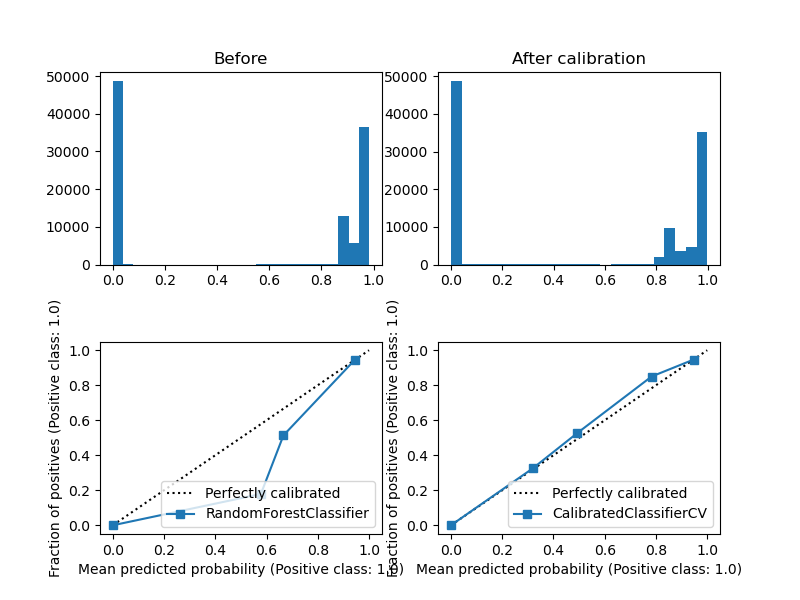

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibrationDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold
#
from myown_pack.common import load

random_state = 42

# -- load dataset
p1 = 'train_over.pickle'
df_train = load(p1)
X_train = df_train.drop(columns=['tag'])
y_train = 1 - df_train['tag']

p2 = 'test.pickle'
df_test = load(p1)
X_test = df_test.drop(columns=['tag'])
y_test = 1 - df_test['tag']

# ---- plot default and calibrated classifiers
fig = plt.figure(figsize=(8,6))
gs = fig.add_gridspec(2,2, hspace=0.4, wspace=0.2)
#                       left=2.1, right=0.1, bottom=0.1, top=0.9,
#                       wspace=0.9, hspace=0.1)
# | 1 | 2 |
# | 3 | 4 |

d1 = fig.add_subplot(gs[0,0])
d2 = fig.add_subplot(gs[0,1])
d3 = fig.add_subplot(gs[1,0])
d4 = fig.add_subplot(gs[1,1])

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.50, random_state=42, stratify=y)

est_params = {'max_depth': 12, 'max_leaf_nodes': 14, 'min_samples_split': 4, 'n_estimators': 27}
est_params.update({'random_state': random_state, 'n_jobs':2})
clf_default: RandomForestClassifier = RandomForestClassifier(**est_params)

clf_default.fit(X_train, y_train)
y_prob = clf_default.predict_proba(X_test)
print(y_prob[:,1])
d1.hist(y_prob[:,1], bins='auto')
d1.set(title='Before')
# plt.show()

CalibrationDisplay.from_estimator(clf_default, X_test, y_test, ax=d3)
# plt.show()
# -- train calibrator
# y_prob = MinMaxScaler().fit_transform(y_prob))
# CalibrationDisplay.from_predictions(y_test_oneh[:,1], y_prob[:,],
#                                            ax=d7)

# -- calibrated:
kfold = StratifiedKFold(n_splits=12, random_state=random_state, shuffle=True)
cal_clf = CalibratedClassifierCV(RandomForestClassifier(**est_params), method='isotonic', # "sigmoid",
                                 cv=kfold)
cal_clf.fit(X_train, y_train)
y_prob2 = cal_clf.predict_proba(X_test)
print(y_prob2[:,1])
d2.hist(y_prob2[:,1], bins='auto')
d2.set(title='After calibration')
# plt.show()

import numpy as np
print(y_test.size, y_test.max() + 1)
y_test_oneh = np.zeros((y_test.size, int(y_test.max() + 1)))
# print(y_test_oneh)
# print(np.arange(y_test.size))
y_test_oneh[:, 1] = 1

CalibrationDisplay.from_estimator(cal_clf, X_test, y_test, ax=d4)
plt.savefig('./autoimgs/calibrating.png')
plt.show()
plt.close()

### test calibrated



In [1]:
from sklearn.metrics import get_scorer
# X_test
# est.fit(X_train, y_train)
est = cal_clf
for k in ['accuracy', 'roc_auc', 'precision', 'recall', 'f1']:
    s = get_scorer(k)
    y_pred = est.predict(X_test)
    print('{:40} {:5}'.format(k, s._score_func(y_test, y_pred)))
    # print(k, s._score_func(y_test, y_pred)) # , average='binary'
print()

accuracy                                 0.9710410979970012
roc_auc                                  0.9708914087236685
precision                                0.9461049658743234
recall                                   0.9993116108306562
f1                                       0.9719806942984944

\##+RESULTS: Nov 5

    accuracy                                 0.8228730152627735
    roc_auc                                  0.8231424341535153
    precision                                0.8612325874096038
    recall                                   0.7719902095762582
    f1                                       0.8141732124671028

